In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv files
df=pd.read_csv('fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# Data Exploration (exploratory data analysis or EDA)


In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(1000, 40)

In [5]:
#features in data
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

In [7]:
# Are there any missing values?
df.isna().sum()


months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#_c39 columns contains all null values so we can drop it
df.drop(['_c39'],axis=1,inplace=True)

In [9]:
#checking missing values
df.isna().sum()


months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [10]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [11]:
#Lets describe the dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [12]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of months_as_customer : 391
number of unique valuse of age : 46
number of unique valuse of policy_number : 1000
number of unique valuse of policy_bind_date : 951
number of unique valuse of policy_state : 3
number of unique valuse of policy_csl : 3
number of unique valuse of policy_deductable : 3
number of unique valuse of policy_annual_premium : 991
number of unique valuse of umbrella_limit : 11
number of unique valuse of insured_zip : 995
number of unique valuse of insured_sex : 2
number of unique valuse of insured_education_level : 7
number of unique valuse of insured_occupation : 14
number of unique valuse of insured_hobbies : 20
number of unique valuse of insured_relationship : 6
number of unique valuse of capital-gains : 338
number of unique valuse of capital-loss : 354
number of unique valuse of incident_date : 60
number of unique valuse of incident_type : 4
number of unique valuse of collision_type : 4
number of unique valuse of incident_severity : 4
numb

In [13]:
# Check if ? is present
for col in df:
    print(f"? in {col}: {df[(df[col] == '?')].any().sum()}")


? in months_as_customer: 0
? in age: 0
? in policy_number: 0
? in policy_bind_date: 0
? in policy_state: 0
? in policy_csl: 0
? in policy_deductable: 0
? in policy_annual_premium: 0
? in umbrella_limit: 0
? in insured_zip: 0
? in insured_sex: 0
? in insured_education_level: 0
? in insured_occupation: 0
? in insured_hobbies: 0
? in insured_relationship: 0
? in capital-gains: 0
? in capital-loss: 0
? in incident_date: 0
? in incident_type: 0
? in collision_type: 39
? in incident_severity: 0
? in authorities_contacted: 0
? in incident_state: 0
? in incident_city: 0
? in incident_location: 0
? in incident_hour_of_the_day: 0
? in number_of_vehicles_involved: 0
? in property_damage: 39
? in bodily_injuries: 0
? in witnesses: 0
? in police_report_available: 39
? in total_claim_amount: 0
? in injury_claim: 0
? in property_claim: 0
? in vehicle_claim: 0
? in auto_make: 0
? in auto_model: 0
? in auto_year: 0
? in fraud_reported: 0


In [14]:
# As we can see there are lot of "?" present inplace where no data is given thus 
# we have to replace it by NaN values for further evaluation.... 
df.replace("?",np.NaN,inplace=True)
# checking the fist 10 rows of the dataset.....
df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

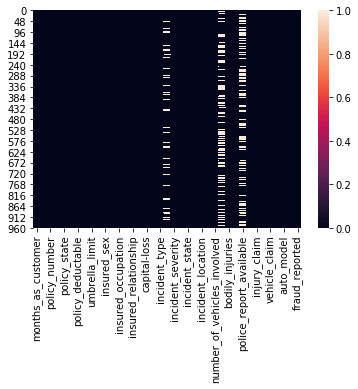

In [15]:
#heatmap for null values
sns.heatmap(df.isnull())

In [16]:
#Separate categorical and numberical columns
cat_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

In [17]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= df[col].value_counts()
    percent = df[col].value_counts() / df.shape[0]
    df1 = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df1)
    print('\n')

--------------------Policy_Bind_Date-------------------------
            total  percent
05-08-1992      3    0.003
28-04-1992      3    0.003
01-01-2006      3    0.003
28-01-2010      2    0.002
29-01-1998      2    0.002
...           ...      ...
29-09-2001      1    0.001
31-10-1993      1    0.001
23-08-1994      1    0.001
29-07-2012      1    0.001
05-12-2007      1    0.001

[951 rows x 2 columns]


--------------------Policy_State-------------------------
    total  percent
OH    352    0.352
IL    338    0.338
IN    310    0.310


--------------------Policy_Csl-------------------------
          total  percent
250/500     351    0.351
100/300     349    0.349
500/1000    300    0.300


--------------------Insured_Sex-------------------------
        total  percent
FEMALE    537    0.537
MALE      463    0.463


--------------------Insured_Education_Level-------------------------
             total  percent
JD             161    0.161
High School    160    0.160
Associate    

# Univariate  Analysis

In [18]:
# Let's find out how many of each class there
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [19]:
#target percentage in dataset
print('Percentage',df.fraud_reported.value_counts(normalize=True))

Percentage N    0.753
Y    0.247
Name: fraud_reported, dtype: float64


Text(0.5, 6.79999999999999, 'target')

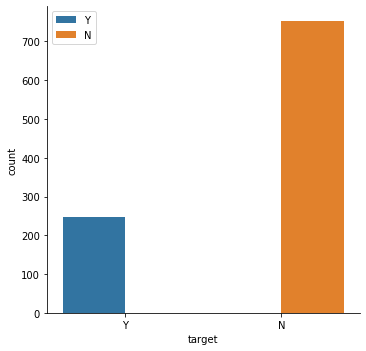

In [20]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='fraud_reported',data=df,kind='count',hue='fraud_reported')
plt.legend()
plt.xlabel("target")

Here  we see classes are imbalanced and there are less no of  frauds are there

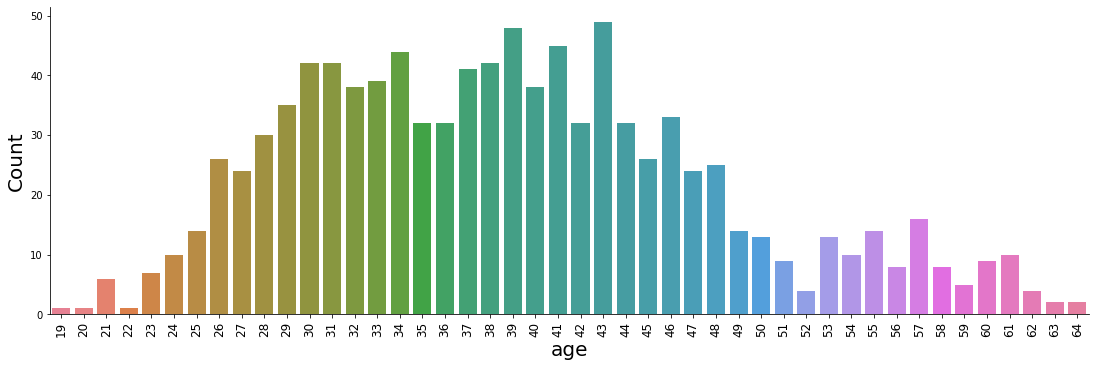

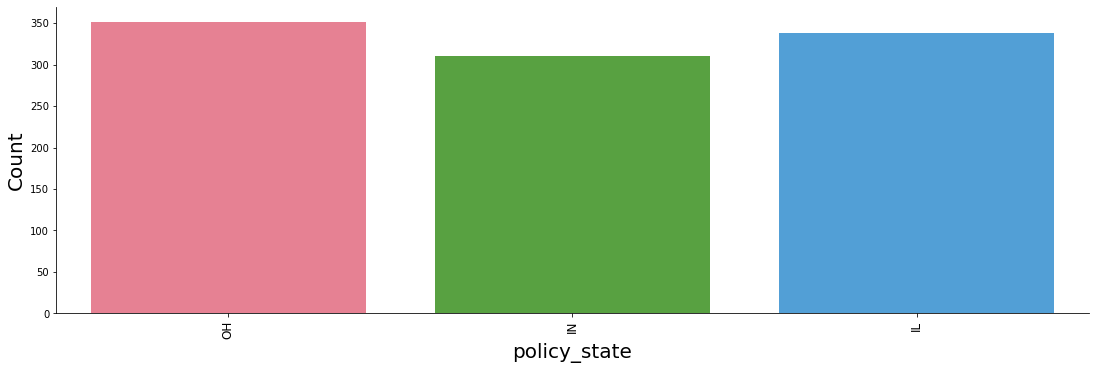

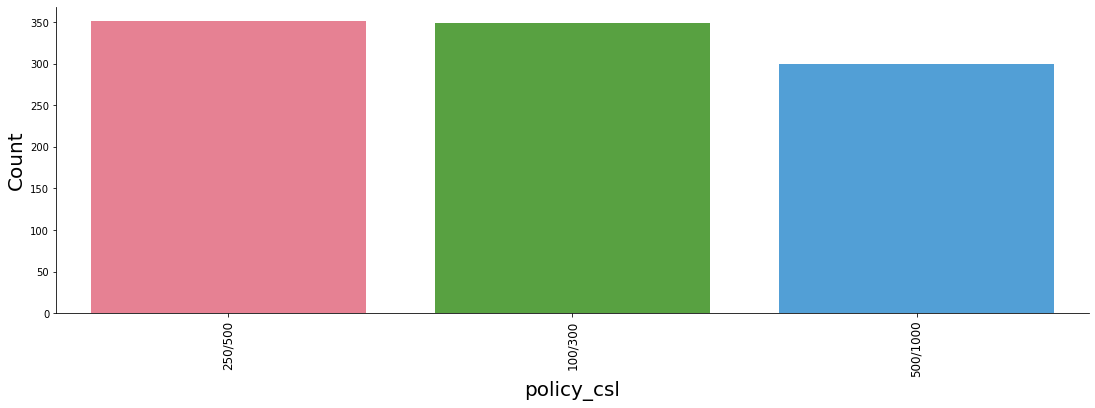

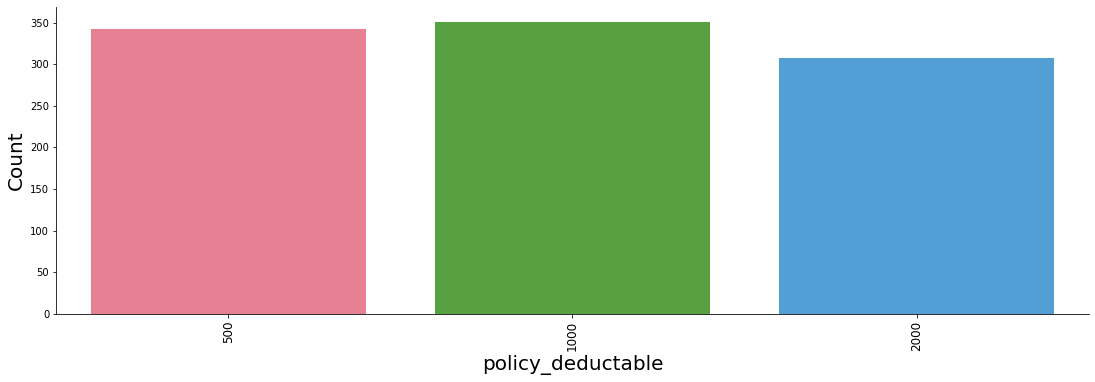

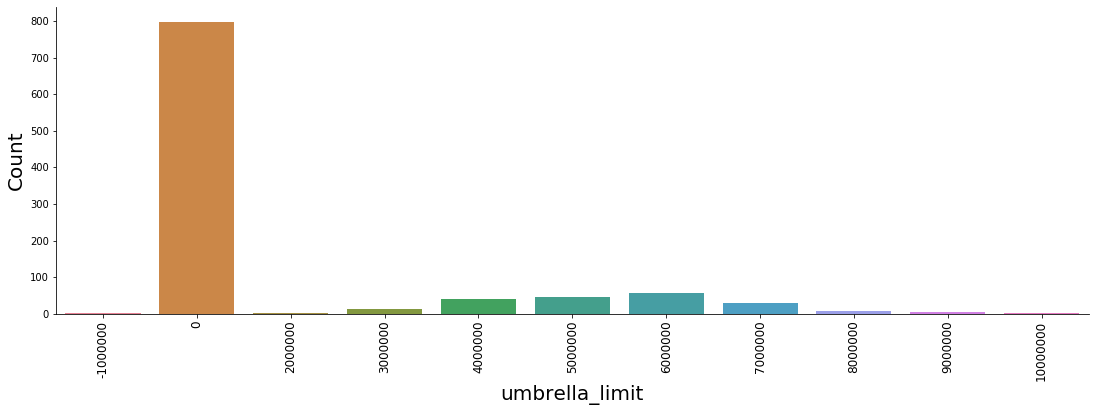

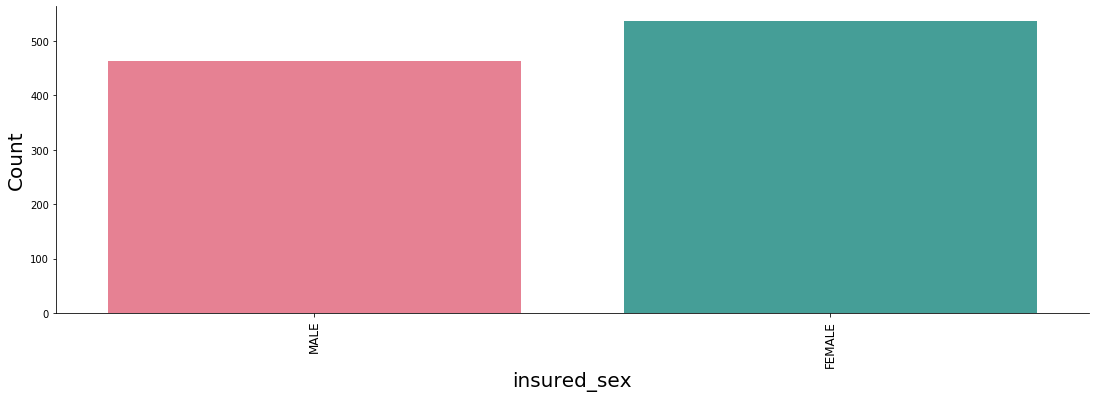

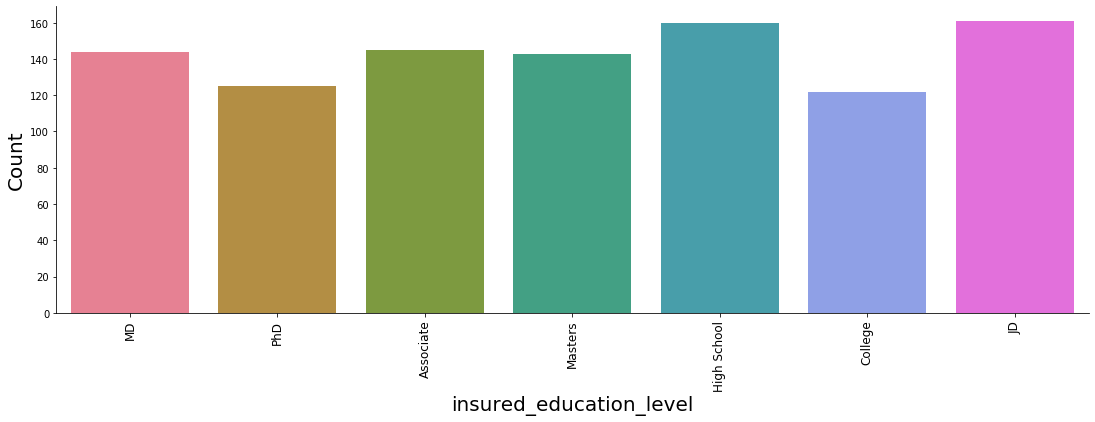

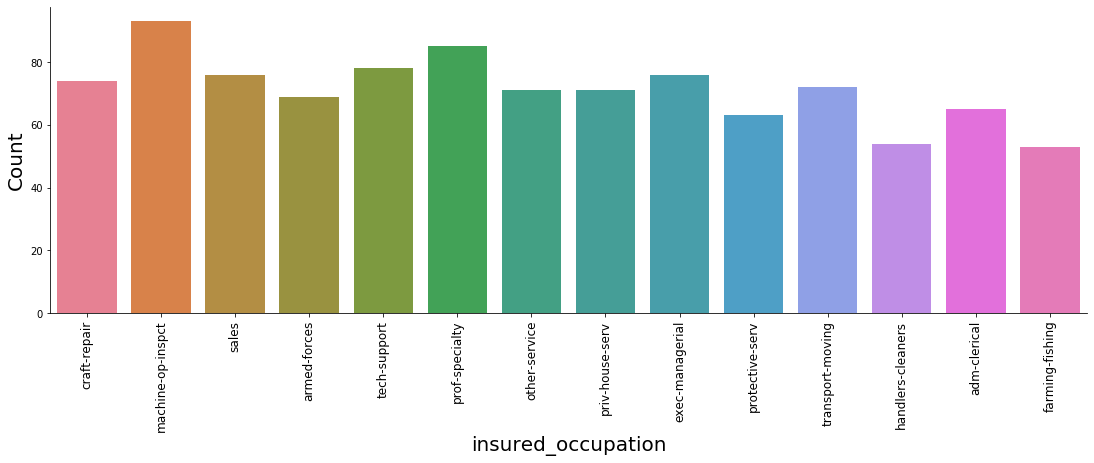

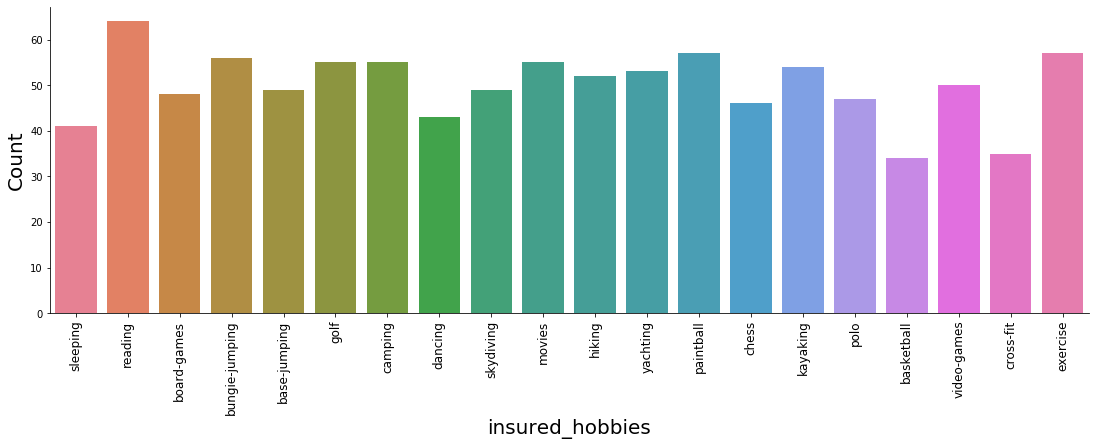

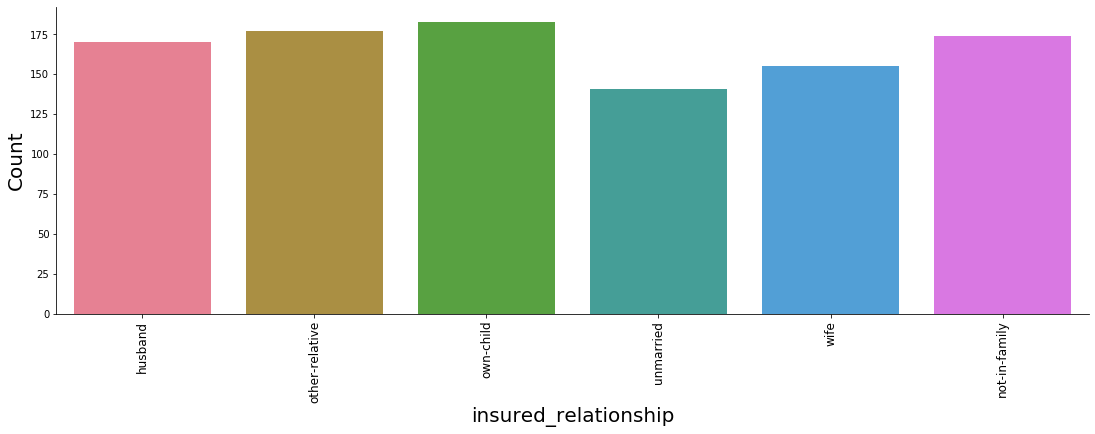

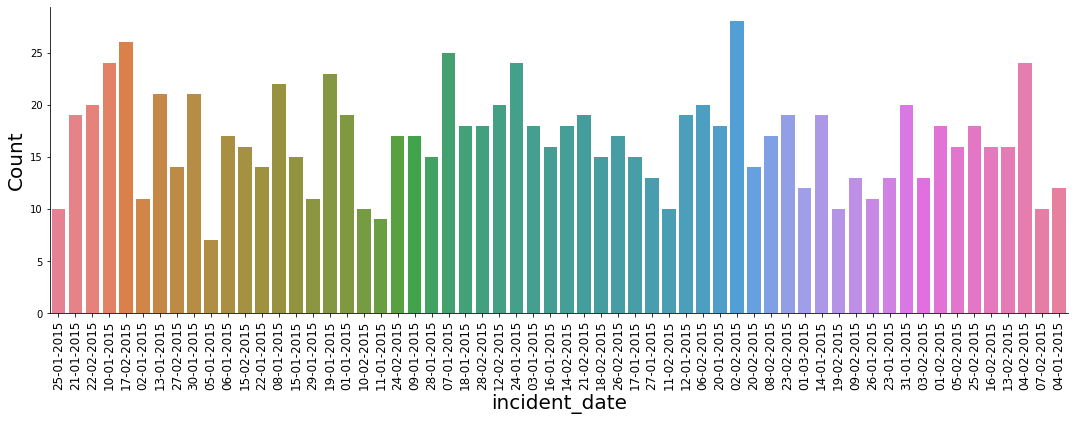

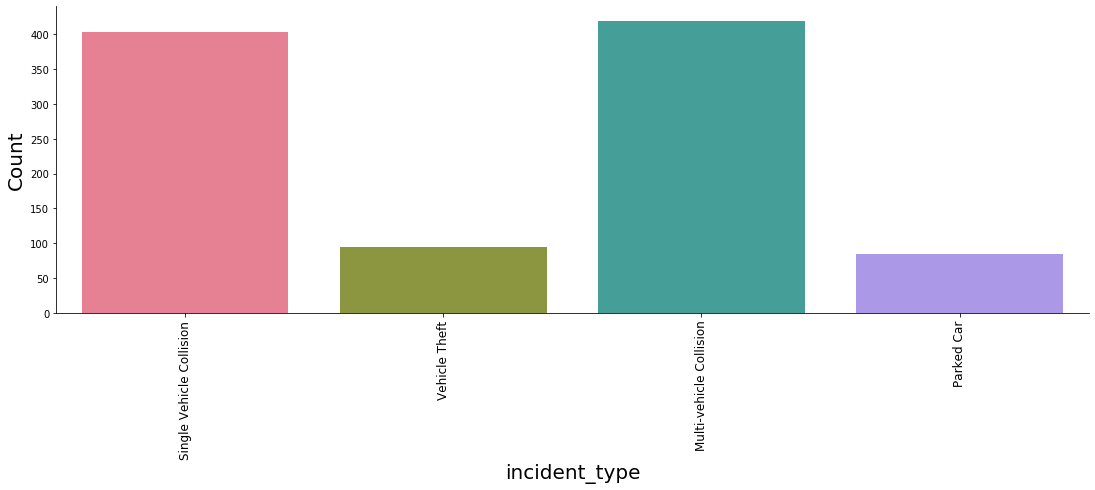

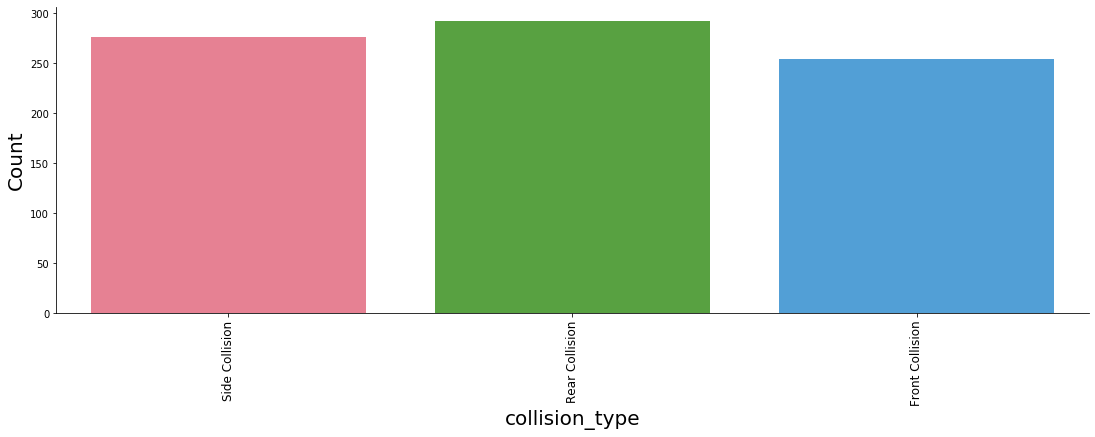

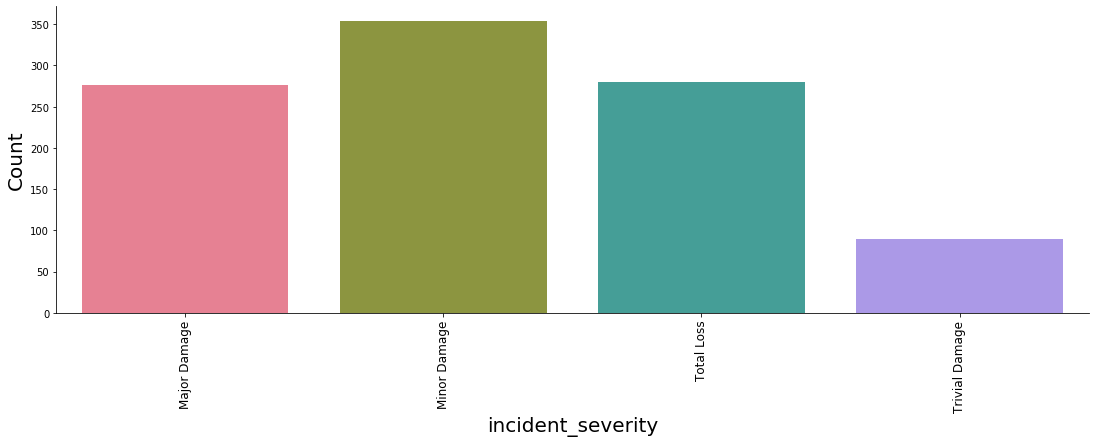

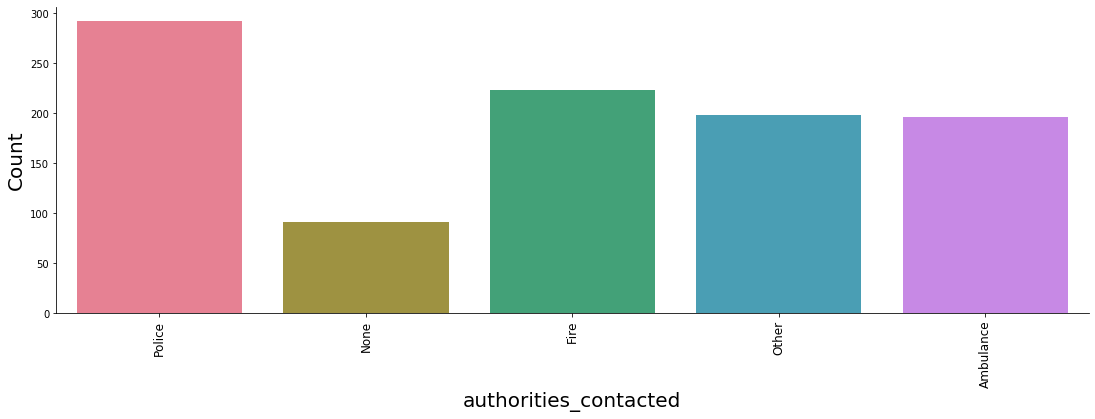

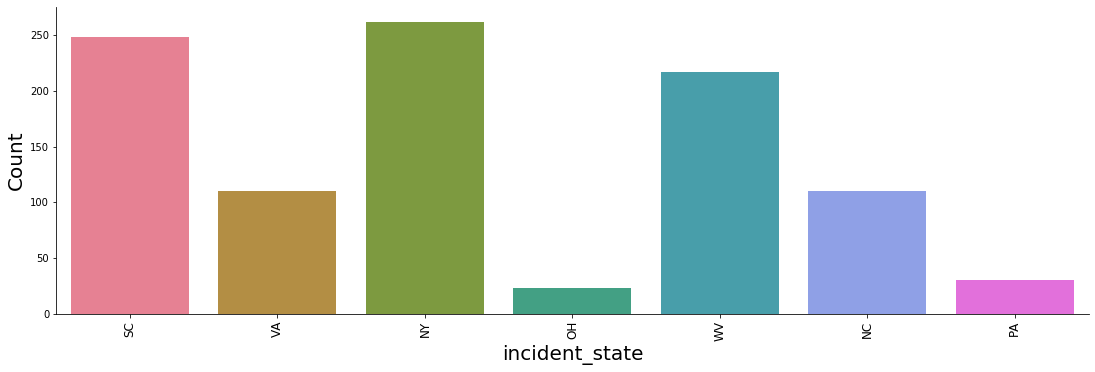

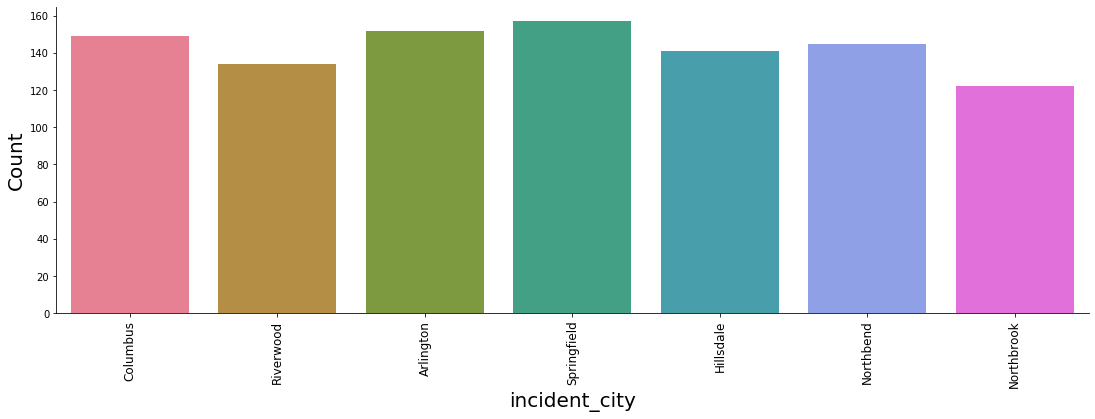

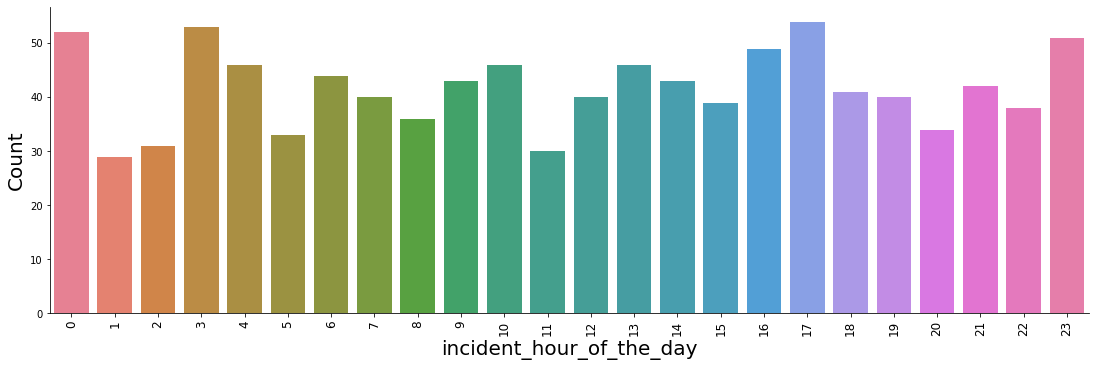

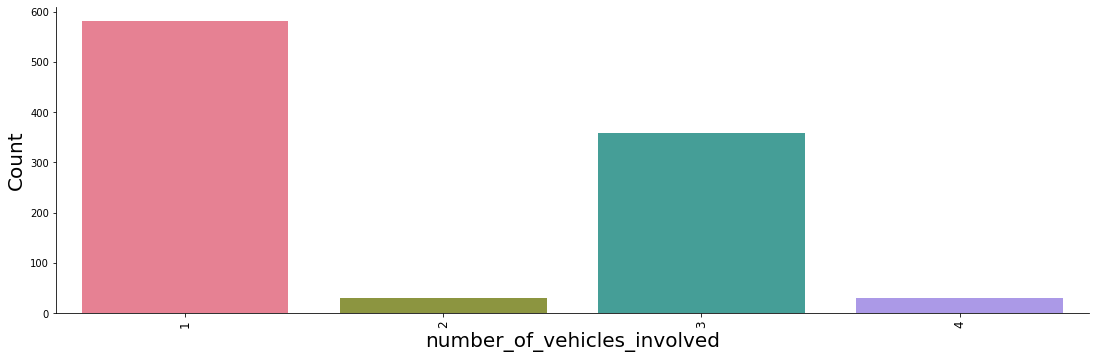

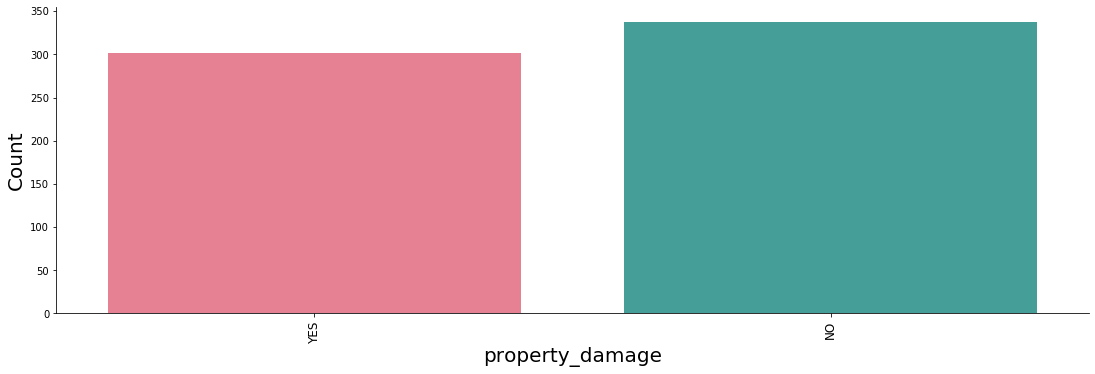

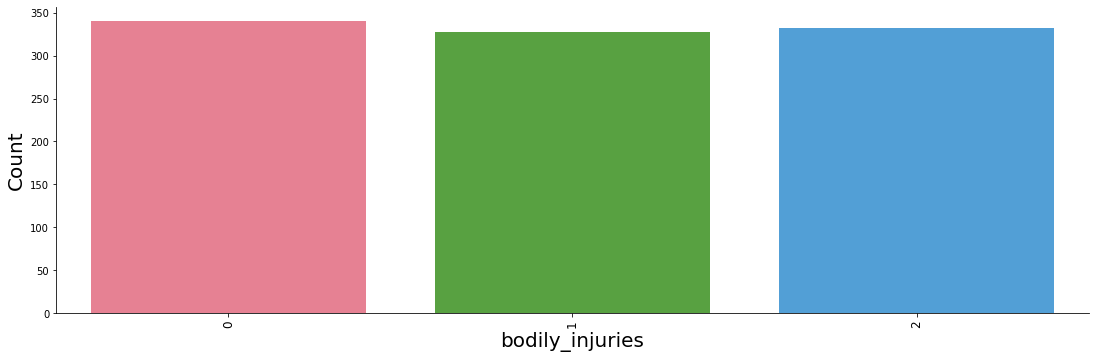

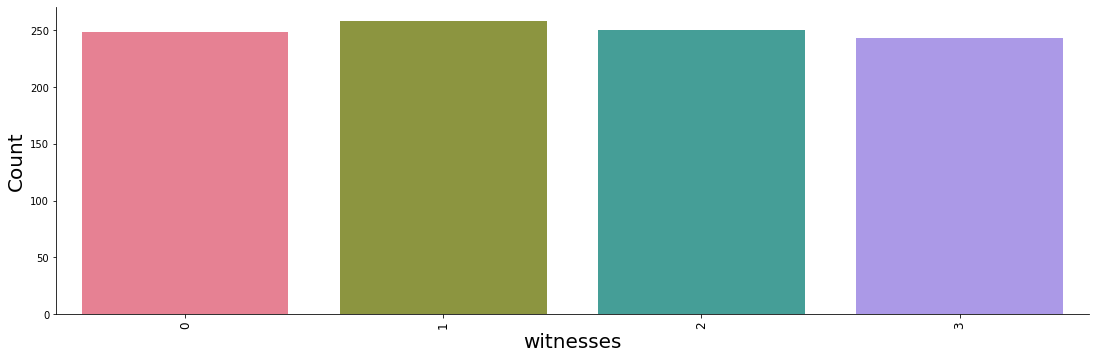

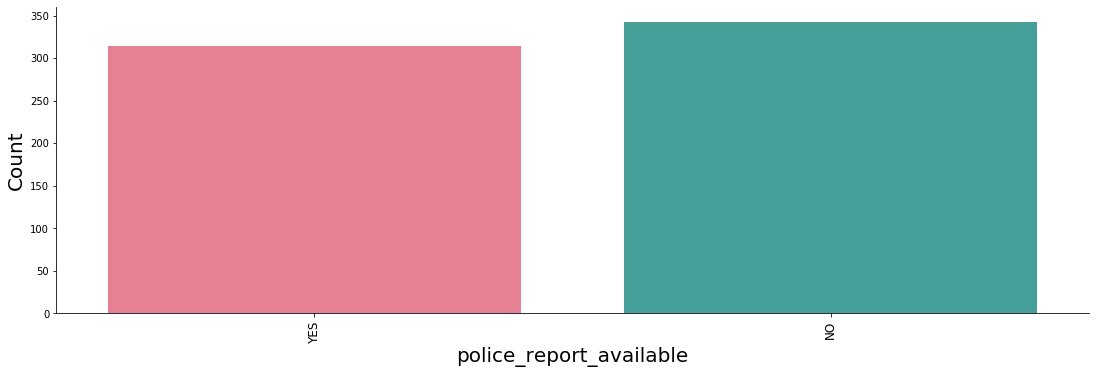

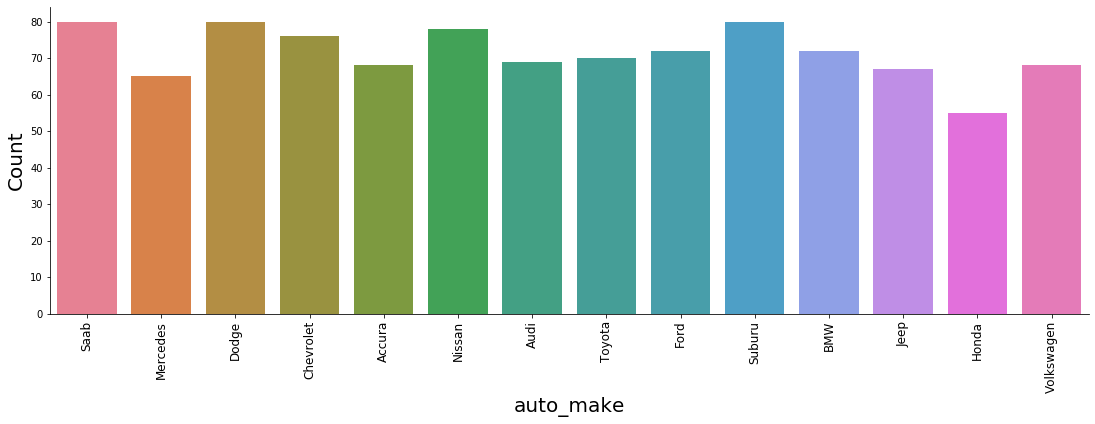

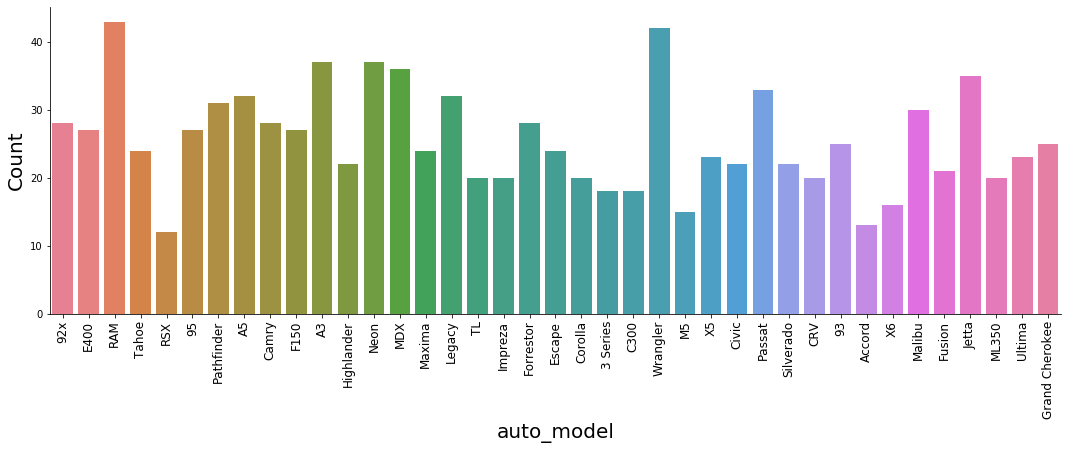

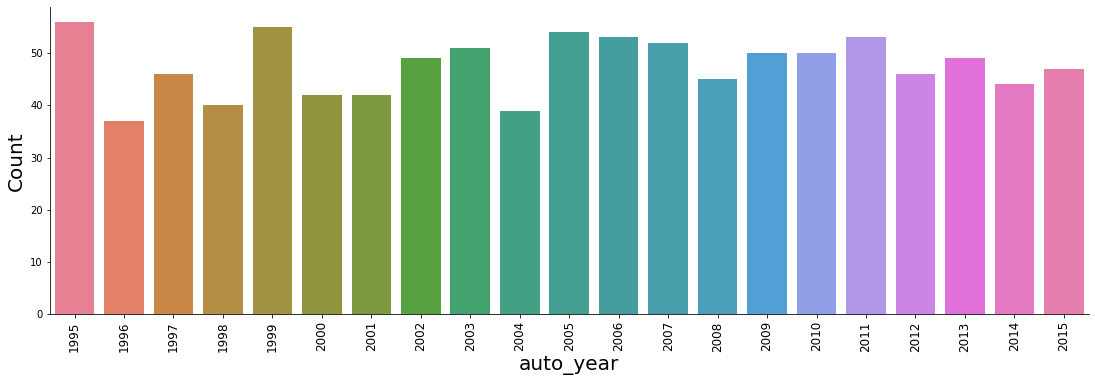

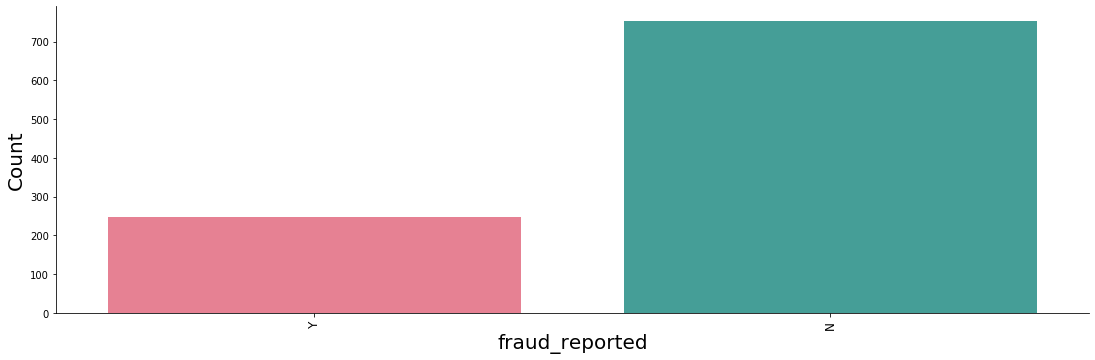

In [21]:
# Counting Number of instances and showing up them in graphs using a for loop...
for i in df.drop(['policy_number','incident_location','policy_annual_premium','insured_zip',
                  'capital-loss','policy_bind_date','total_claim_amount','injury_claim',
                  'property_claim','vehicle_claim','capital-gains','months_as_customer' ],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the graph     

1) Number of persons who have done fraud increases as age increases upto age 41 and after that it starts decreases as age increases.
2) In Policy 'IL' number of frauds are less as compared to the ploicy 'OH' and 'IN'.
3) Less frauds occured where policy_deductable is 1000.
4) More fraud occurs where umbrella_limit is 0.
5) Males do more fraud than females.
6) Less fraud is less where insured education level is High School.
7) Fraud is more where occupation 'isexec-managerial' and less where occupation is 'machine-op-inspct'.
8) Fraud is more where insured_hobbies is 'Chess' and less where insured_hobbies is 'camping'.
9) Fraud is done more in single and mutli-vehicle collision.
10) Proportion of rear collision is more.
11) More fraud occurs when damage is Major.
12) Proportion where ambulance is contacted is more than fire, police etc
13) More Number of incidents are more where incident_statae is 'SC'.

In [22]:
# Exploring Case when capital-gain and capital-loss both are zero. As this category of people are more in our dataset.
cat_col = df.dtypes[df.dtypes == 'object']

print(f"Number of observations having capital gain and capital loss zero: {df[(df['capital-loss'] == 0) & (df['capital-gains'] == 0)].shape}")
for col in cat_col.index:
    print(f"================================{col}=================================")
    print(df[(df['capital-loss'] == 0) & (df['capital-gains'] == 0)][col].value_counts())

Number of observations having capital gain and capital loss zero: (251, 39)
================================policy_bind_date=================================
07-12-1999    2
28-04-1992    2
29-09-1999    2
15-12-1996    1
15-05-2000    1
             ..
11-02-1991    1
20-09-1993    1
03-02-1990    1
27-12-2000    1
10-05-2009    1
Name: policy_bind_date, Length: 248, dtype: int64
================================policy_state=================================
IL    97
OH    83
IN    71
Name: policy_state, dtype: int64
================================policy_csl=================================
100/300     94
250/500     89
500/1000    68
Name: policy_csl, dtype: int64
================================insured_sex=================================
FEMALE    137
MALE      114
Name: insured_sex, dtype: int64
================================insured_education_level=================================
Masters        43
JD             42
MD             39
High School    35
College        34
Associate 

In [23]:
# Exploring Case when capital-gain and capital-loss both are greater than zero.

capital_loss_df = df[df['capital-loss']>0]
capital_gain_df = df[df['capital-gains']>0]

print(f"Number of observations having capital loss above median value: {capital_loss_df.shape}\nNumber of observations in capital gain dataset above median value: {capital_gain_df.shape}")
print(f"Percentage of people having capital gain greater than median value: {(df.loc[df['capital-gains'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")
print(f"Percentage of people having capital loss greater than median value: {(df.loc[df['capital-loss'] > 0,:].shape[0] / df.shape[0])*100:.4f}%")

Number of observations having capital loss above median value: (0, 39)
Number of observations in capital gain dataset above median value: (492, 39)
Percentage of people having capital gain greater than median value: 49.2000%
Percentage of people having capital loss greater than median value: 0.0000%


months_as_customer                AxesSubplot(0.125,0.772143;0.168478x0.107857)
age                            AxesSubplot(0.327174,0.772143;0.168478x0.107857)
policy_number                  AxesSubplot(0.529348,0.772143;0.168478x0.107857)
policy_deductable              AxesSubplot(0.731522,0.772143;0.168478x0.107857)
policy_annual_premium             AxesSubplot(0.125,0.642714;0.168478x0.107857)
umbrella_limit                 AxesSubplot(0.327174,0.642714;0.168478x0.107857)
insured_zip                    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
capital-gains                  AxesSubplot(0.731522,0.642714;0.168478x0.107857)
capital-loss                      AxesSubplot(0.125,0.513286;0.168478x0.107857)
incident_hour_of_the_day       AxesSubplot(0.327174,0.513286;0.168478x0.107857)
number_of_vehicles_involved    AxesSubplot(0.529348,0.513286;0.168478x0.107857)
bodily_injuries                AxesSubplot(0.731522,0.513286;0.168478x0.107857)
witnesses                         AxesSu

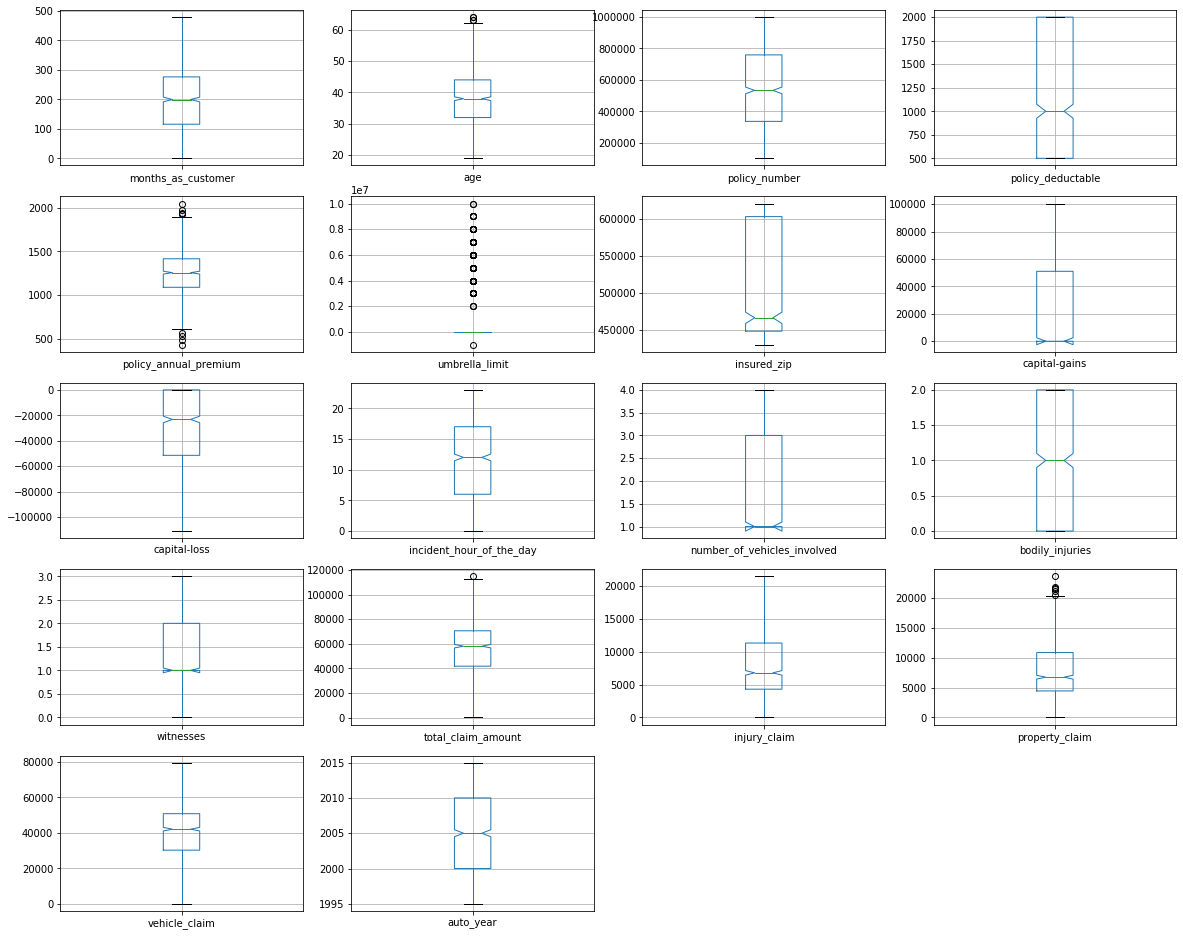

In [24]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(6,4),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013923ABEF88>,
      dtype=object)

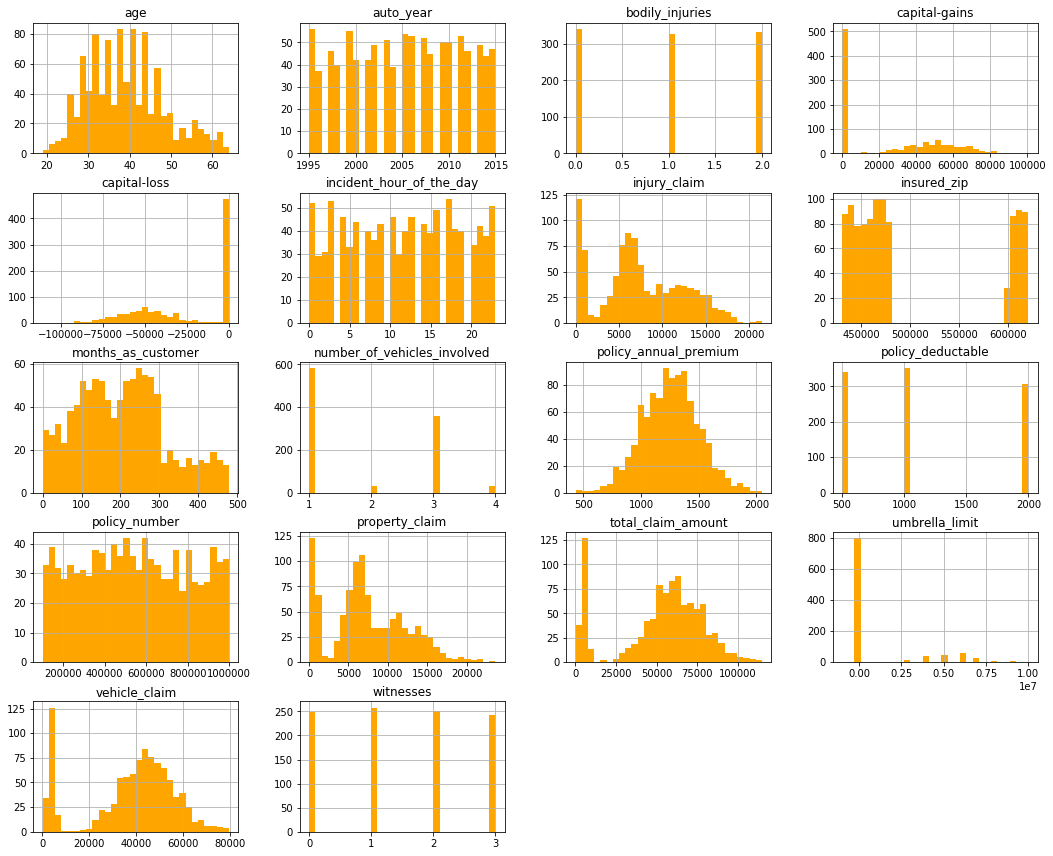

In [25]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(6,4),bins=30,color='orange')

# Bivarient  Analysis


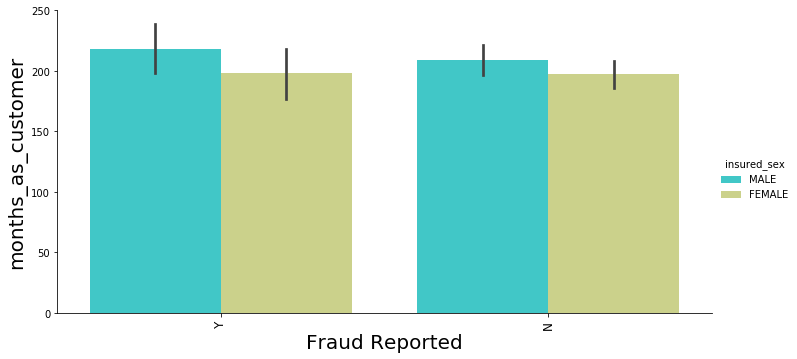

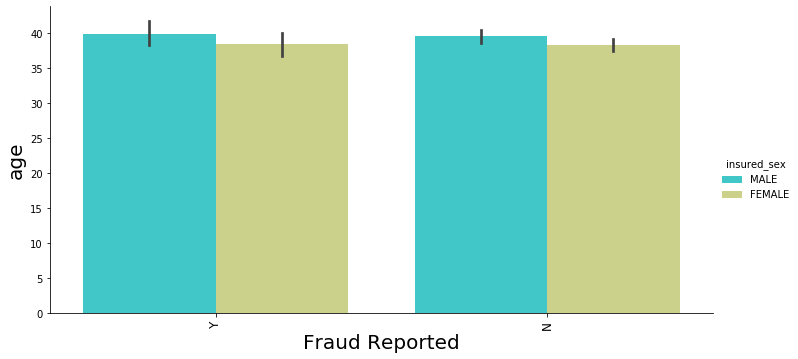

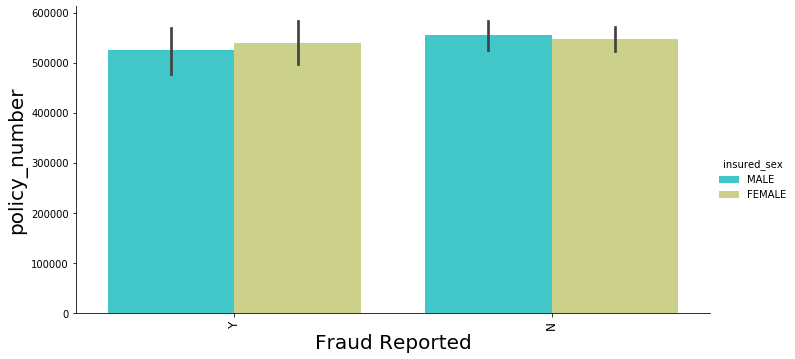

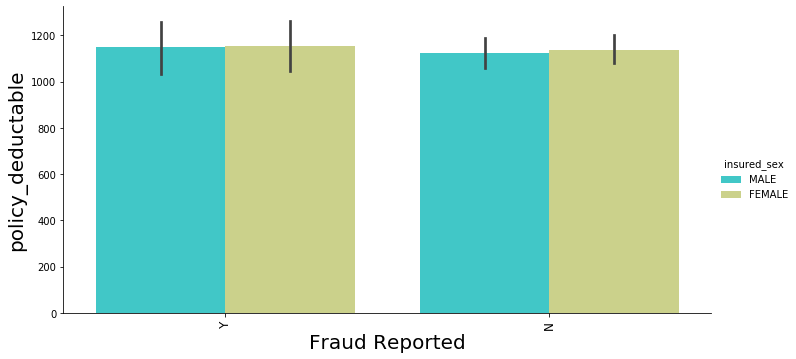

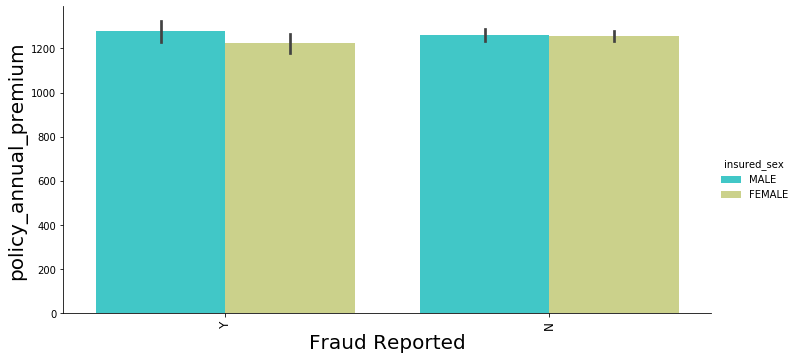

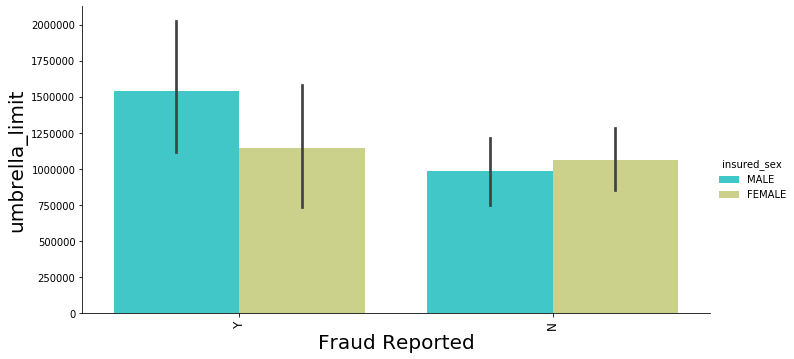

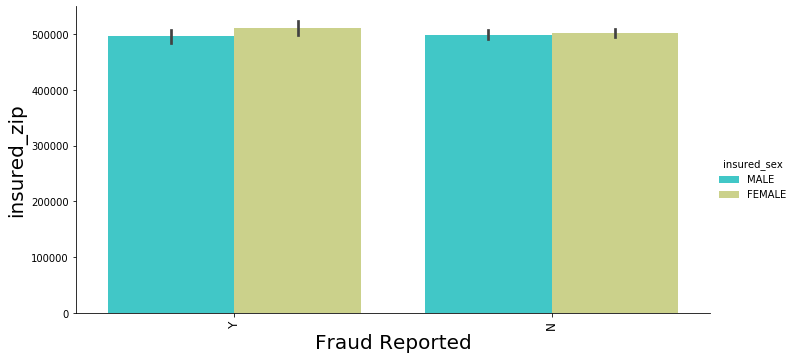

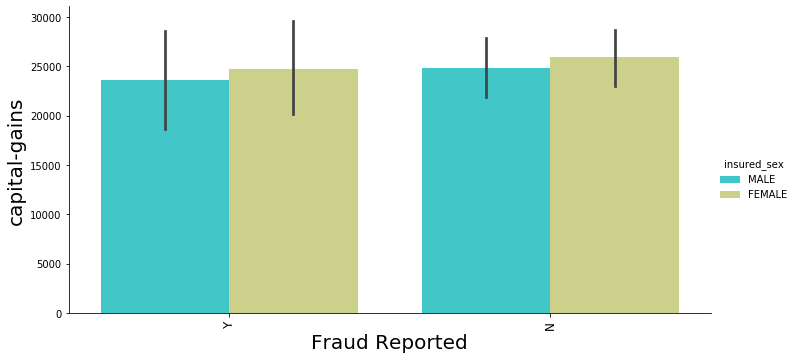

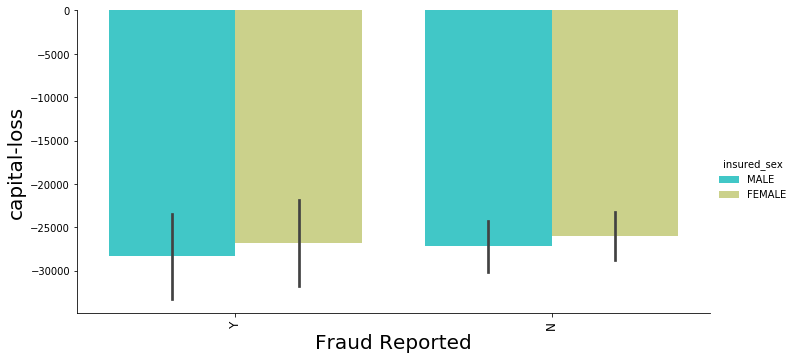

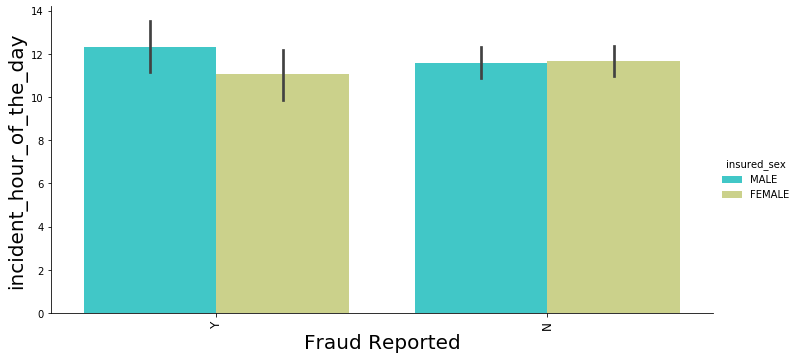

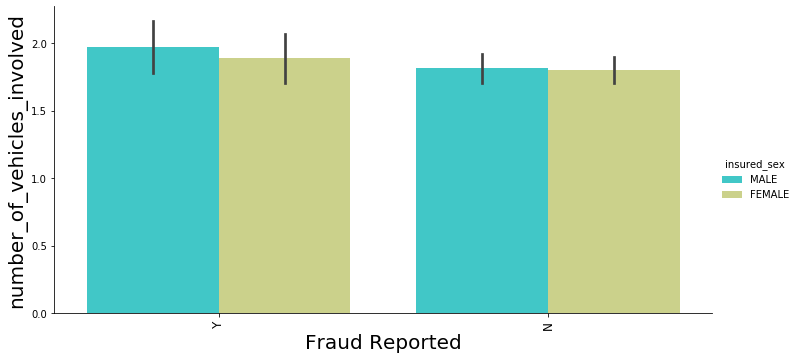

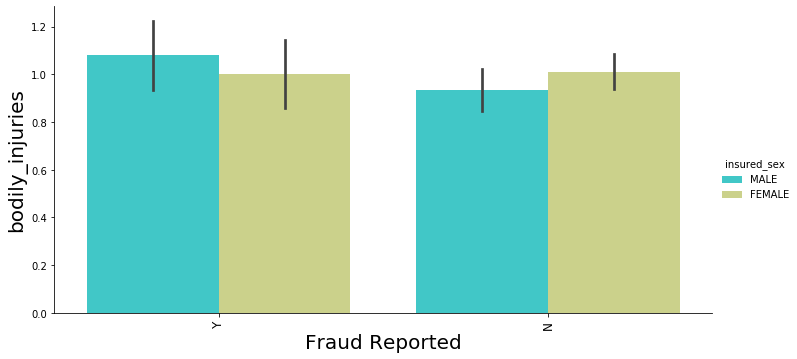

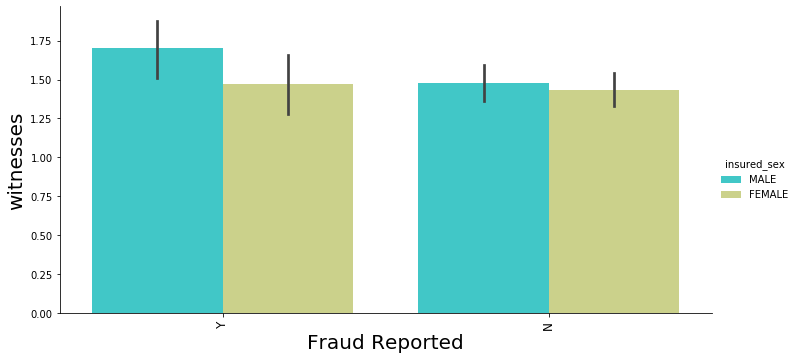

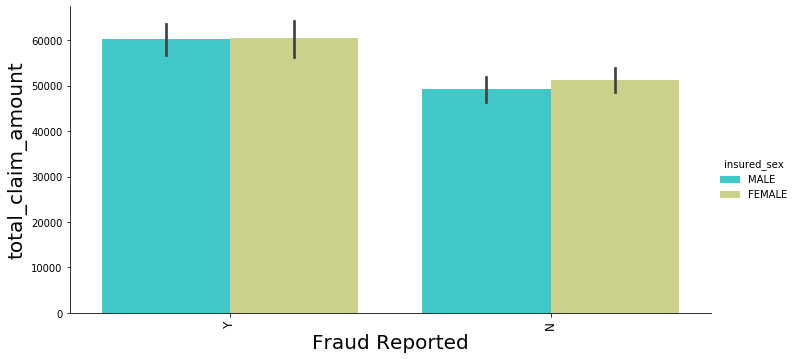

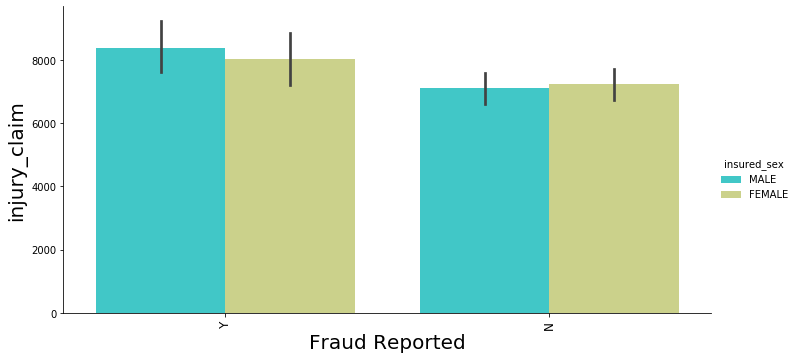

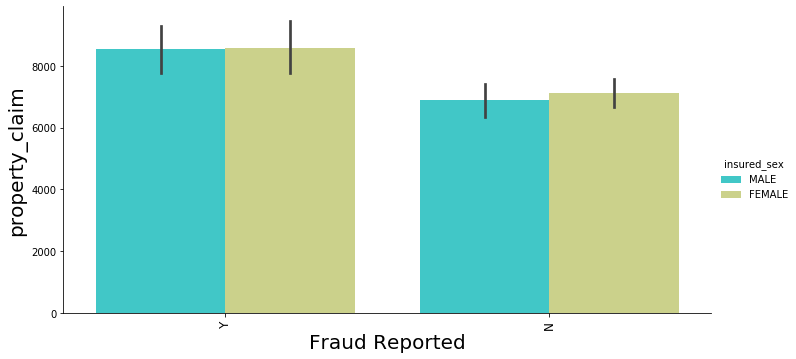

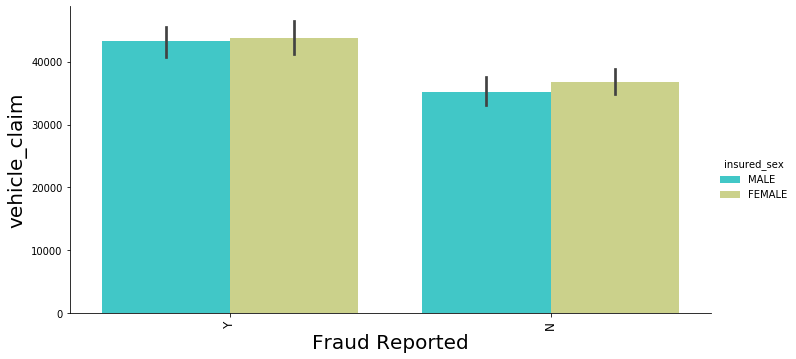

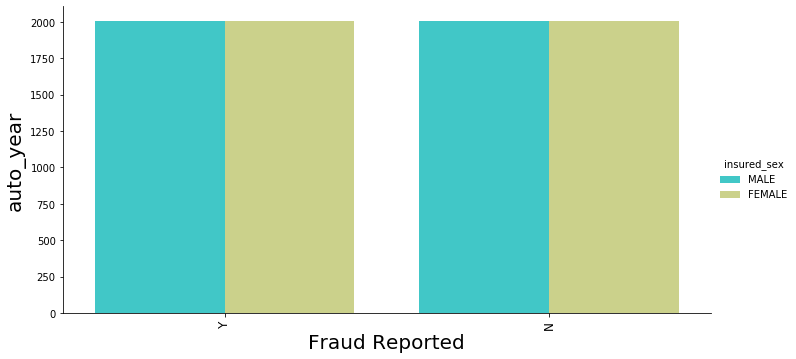

In [26]:
# for loop to plot graphs between fraud_reported and different numerical features of the dataset....
for i in num_col.index.values:
    sns.catplot(y=i,
                data=df,
                x='fraud_reported',
                palette='rainbow',
                height=5,
                aspect=2,
                hue='insured_sex',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel('Fraud Reported',fontsize=20)


In [27]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of months_as_customer : 391
number of unique valuse of age : 46
number of unique valuse of policy_number : 1000
number of unique valuse of policy_bind_date : 951
number of unique valuse of policy_state : 3
number of unique valuse of policy_csl : 3
number of unique valuse of policy_deductable : 3
number of unique valuse of policy_annual_premium : 991
number of unique valuse of umbrella_limit : 11
number of unique valuse of insured_zip : 995
number of unique valuse of insured_sex : 2
number of unique valuse of insured_education_level : 7
number of unique valuse of insured_occupation : 14
number of unique valuse of insured_hobbies : 20
number of unique valuse of insured_relationship : 6
number of unique valuse of capital-gains : 338
number of unique valuse of capital-loss : 354
number of unique valuse of incident_date : 60
number of unique valuse of incident_type : 4
number of unique valuse of collision_type : 3
number of unique valuse of incident_severity : 4
numb

In [28]:
#Let's plot fraud_reported  v/s age
#calculate maximum values for bin
df.age.max()

64

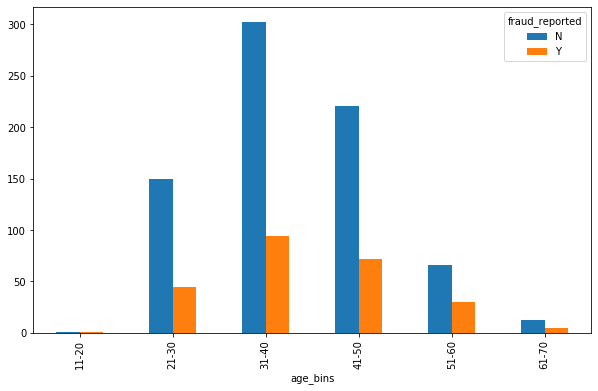

In [29]:
#create a colum age_bins
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])
age_vs_fraud = pd.crosstab(df['age_bins'], df['fraud_reported'])
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))


We can see that, highest no. of frauds have been reported in the age range of 31-40.

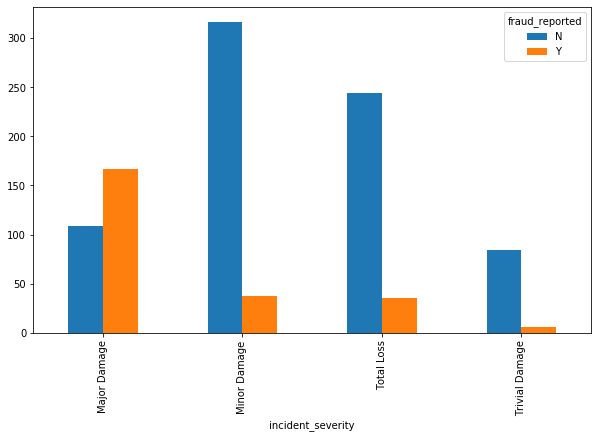

In [30]:
incisev_vs_fraud = pd.crosstab(df['incident_severity'], df['fraud_reported'])
incisev_vs_fraud.plot(kind = 'bar', figsize = (10,6))


As we can observe that incidents involving minor damage have higher cases of fraud report.

In [31]:
#total insurance claims v/s fraud reported
print(df.total_claim_amount.min())
print(df.total_claim_amount.max())


100
114920


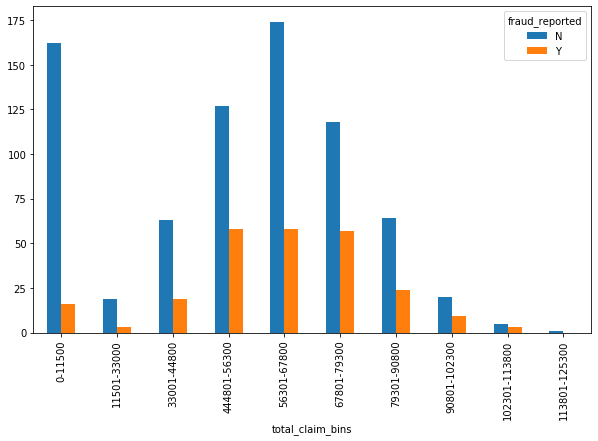

In [32]:

df['total_claim_bins'] = pd.cut(df.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])
total_claim_vs_fraud = pd.crosstab(df.total_claim_bins, df.fraud_reported)
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))


We can clearly observe significant amount of variation in reporting of fraud cases according to the Total insurance claim amount.

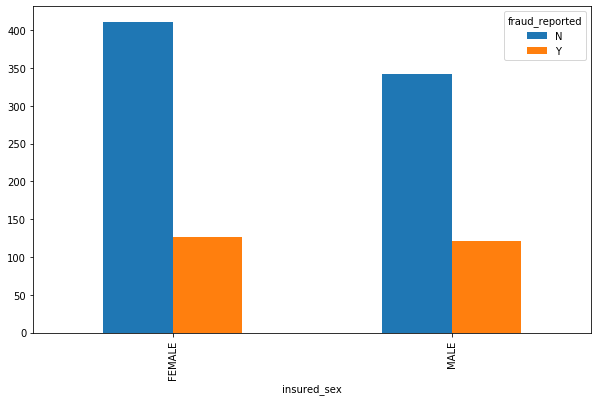

In [33]:
#Let's analyze fraud reporting gender wise
gender_wise_fraud = pd.crosstab(df.insured_sex, df.fraud_reported)
gender_wise_fraud.plot(kind = 'bar', figsize = (10,6))



Female leads with highest number of fraud reported cases

In [34]:
#Let's check relationship b/w policy_annual_premium v/s fraud_reported
print(df.policy_annual_premium.min())
print(df.policy_annual_premium.max())


433.33
2047.59


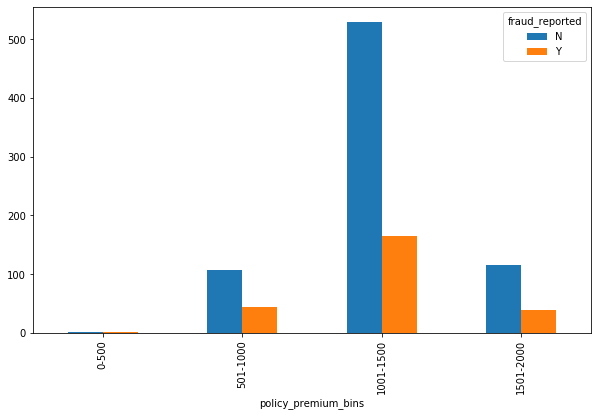

In [35]:

df['policy_premium_bins'] = pd.cut(df.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])
policy_premium_vs_fraud = pd.crosstab(df.policy_premium_bins, df.fraud_reported)
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (10,6))


In [36]:
#drop policy_premium_bins total_claim_bins age_bins
df.drop(["policy_premium_bins","total_claim_bins","age_bins"],axis=1,inplace=True)

In [37]:
# Replacing the null values with the Most Frequent occuring value....
from sklearn.impute import SimpleImputer
imp1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['collision_type']=imp1.fit_transform(df['collision_type'].values.reshape(-1,1))
df['property_damage']=imp1.fit_transform(df['property_damage'].values.reshape(-1,1))
df['police_report_available']=imp1.fit_transform(df['police_report_available'].values.reshape(-1,1))

In [38]:
#Checking null values after using SimpleImputer
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [39]:
#lets check skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

In [40]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in cat_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [41]:
#lets remove the skewness
for i in df.drop(['fraud_reported'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.494499
insured_zip                    0.782405
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [42]:
df.dropna(inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0.000000,13.052226,...,2,0.693147,5127992100,6510,13020,2712326400,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,15.424949,13.056602,...,0,0.000000,25704900,780,780,12320100,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,15.424949,12.973011,...,3,0.000000,1200622500,7700,3850,533610000,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,15.607270,13.318124,...,2,0.000000,4019560000,6340,6340,2572518400,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,15.607270,13.322373,...,1,0.000000,42250000,1300,650,20702500,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0.000000,12.974536,...,1,0.000000,7603840000,17440,8720,3725881600,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0.000000,13.318223,...,3,0.000000,11767910400,18080,18080,5230182400,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,14.914123,13.000869,...,3,0.693147,4556250000,7500,7500,2756250000,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,15.424949,12.998420,...,1,0.693147,2207120400,5220,5220,1335171600,1,5,1998,0


In [43]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)#shape of dataset before outliers remove
df_census=df.loc[(z<3).all(axis=1)]
print(df_census.shape)#shape of dataset after outliers removed

(999, 39)
(981, 39)


months_as_customer             0.369099
age                            0.481972
policy_number                  0.021106
policy_bind_date               0.014940
policy_state                  -0.013343
policy_csl                     0.085199
policy_deductable              0.470500
policy_annual_premium          0.040537
umbrella_limit                 1.473901
insured_zip                    0.789865
insured_sex                    0.133013
insured_education_level        0.005664
insured_occupation            -0.067531
insured_hobbies               -0.055114
insured_relationship           0.075557
capital-gains                  0.475946
capital-loss                  -0.386933
incident_date                  0.002861
incident_type                  0.116532
collision_type                -0.030928
incident_severity              0.268473
authorities_contacted         -0.121196
incident_state                -0.144553
incident_city                  0.045751
incident_location             -0.001069


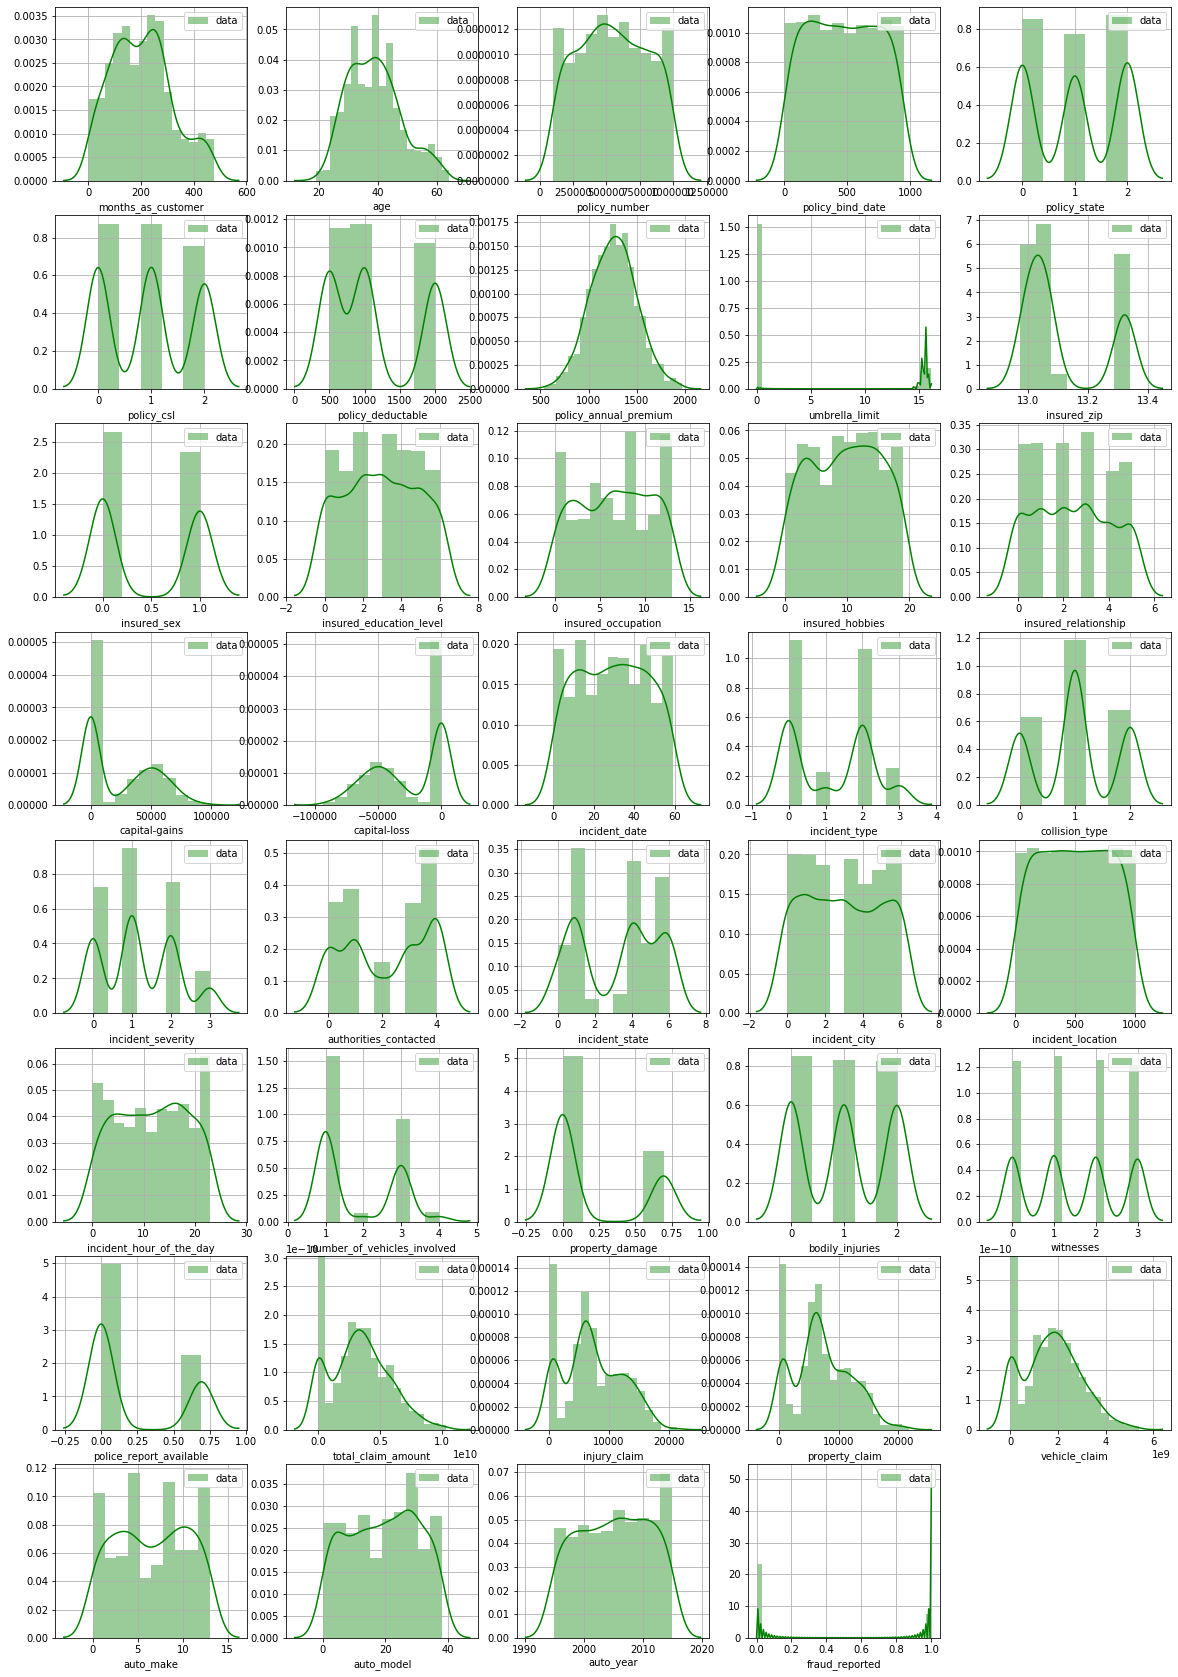

In [44]:
# Checking the Normal Distribution using distplot after removing outliers
plt.figure(figsize=(20,30))
for i,col in enumerate(list(df_census.columns.values)):
    plt.subplot(8,5,i+1)
    sns.distplot(df_census[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
df_census.skew()

In [45]:
# Checking the correlation
df_census.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

In [46]:
#Feature Removal
print(f"Number of columns before deleting: {df_census.shape[1]}")
del_cols = ['policy_bind_date','policy_number','policy_csl','incident_date','incident_location','insured_zip']
df_census.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_census.shape[1]}")

Number of columns before deleting: 39
Number of columns after deleting: 33


In [47]:
df_census.isna().isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

# Modeling


In [48]:
# Split data into X and y
X = df_census.drop("fraud_reported", axis=1)

y = df_census["fraud_reported"]

In [49]:
# Independent variables (no target column)
X.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1000,1406.91,0.000000,1,4,2,17,...,1,2,0.693147,5127992100,6510,13020,2712326400,10,1,2004
1,228,42,1,2000,1197.22,15.424949,1,4,6,15,...,0,0,0.000000,25704900,780,780,12320100,8,12,2007
2,134,29,2,2000,1413.14,15.424949,0,6,11,2,...,2,3,0.000000,1200622500,7700,3850,533610000,4,30,2007
3,256,41,0,2000,1415.74,15.607270,0,6,1,2,...,1,2,0.000000,4019560000,6340,6340,2572518400,3,34,2014
4,228,44,0,1000,1583.91,15.607270,1,0,11,2,...,0,1,0.000000,42250000,1300,650,20702500,0,31,2009


In [50]:
# Target variable
y


0      1
1      1
2      0
3      1
4      0
      ..
994    0
995    0
997    0
998    0
999    0
Name: fraud_reported, Length: 981, dtype: int32

In [51]:
#checking shape of input variable
X.shape

(981, 32)

In [52]:
#checking shape of target variable
y.shape

(981,)

In [53]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.082642,0.994979,1.195215,-0.226459,0.620889,-0.505937,1.068607,0.533641,-1.161363,1.286317,...,0.012467,0.462394,1.485221,0.751546,-0.170798,1.223115,0.814510,0.851746,-1.644809,-0.188303
1,0.211734,0.336581,-0.008590,1.407043,-0.254721,1.967612,1.068607,0.533641,-0.166995,0.934280,...,-1.210505,-1.337641,-0.673300,-1.428849,-1.357002,-1.377730,-1.445723,0.354683,-0.656110,0.311405
2,-0.606919,-1.089946,1.195215,1.407043,0.646904,1.967612,-0.935798,1.562133,1.075965,-1.353961,...,1.235438,1.362412,-0.673300,-0.926763,0.075551,-0.725394,-1.009340,-0.639443,0.961763,0.311405
3,0.455589,0.226848,-1.212395,1.407043,0.657761,1.996849,-0.935798,1.562133,-1.409955,-1.353961,...,0.012467,0.462394,-0.673300,0.277872,-0.205991,-0.196301,0.697473,-0.887974,1.321290,1.477390
4,0.211734,0.556047,-1.212395,-0.226459,1.359995,1.996849,1.068607,-1.523342,1.075965,-1.353961,...,-1.210505,-0.437623,-0.673300,-1.421778,-1.249353,-1.405353,-1.438706,-1.633569,1.051644,0.644543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-0.545955,-0.980213,-0.008590,-0.226459,0.370888,-0.505937,1.068607,-0.494850,1.075965,-1.177942,...,0.012467,0.462394,1.485221,-1.421889,-1.406686,-1.313984,-1.436264,-0.142380,-0.835873,-1.520858
977,-1.747808,-0.102350,1.195215,-0.226459,0.219559,-0.505937,-0.935798,1.047887,-1.161363,0.582243,...,-1.210505,-0.437623,-0.673300,1.809567,2.091891,0.309419,1.662978,-0.142380,-1.195400,0.144835
978,-0.641755,-0.541282,1.195215,-1.043210,0.523093,1.885696,-0.935798,1.047887,-1.409955,-1.177942,...,1.235438,1.362412,1.485221,0.507220,0.034148,0.050185,0.851279,1.100277,-0.026937,-1.520858
979,2.214823,2.531239,-1.212395,1.407043,0.412144,1.967612,1.068607,-1.523342,-0.415587,-1.705998,...,-1.210505,-0.437623,1.485221,-0.496650,-0.437849,-0.434286,-0.338336,-1.385037,-1.285282,-1.187719


In [54]:
#since it is imbalanced dataset so we will focus on auc-roc score.
!pip install -U imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.22,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

Requirement already up-to-date: imbalanced-learn in c:\users\devanshu suri\anaconda3\lib\site-packages (0.6.2)


In [55]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def maxrandomcore(model,x,y):
    max_acc_score=0
    for acc_state in range(42,100): 
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        accuracy_score1=accuracy_score(y_test,y_pred)
        if accuracy_score1 > max_acc_score:
            max_acc_score=accuracy_score1
            final_acc_state=acc_state
    print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)
    return final_acc_state

In [56]:
# Evaluate the model on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.naive_bayes import MultinomialNB
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),
          "XGBClassifier":XGBClassifier(),
          "AdaBoostClassifier":AdaBoostClassifier()
         }

# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        acc_state=maxrandomcore(model,x,y)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [57]:
#learning scores of a model
model_scores = fit_and_score(models=models)

model_scores


max acc score corresponding to 47 is: 0.817258883248731
max acc score corresponding to 64 is: 0.7715736040609137
max acc score corresponding to 65 is: 0.8121827411167513
max acc score corresponding to 55 is: 0.8071065989847716
max acc score corresponding to 45 is: 0.7715736040609137
max acc score corresponding to 47 is: 0.817258883248731
max acc score corresponding to 82 is: 0.8578680203045685
max acc score corresponding to 81 is: 0.868020304568528
max acc score corresponding to 91 is: 0.8578680203045685


{'Logistic Regression': 0.7895408163265306,
 'KNN': 0.8035714285714286,
 'Random Forest': 1.0,
 'GaussianNB': 0.7793367346938775,
 'SVC': 0.8775510204081632,
 'DecisionTreeClassifier': 1.0,
 'GradientBoostingClassifier': 0.9681122448979592,
 'XGBClassifier': 1.0,
 'AdaBoostClassifier': 0.8775510204081632}

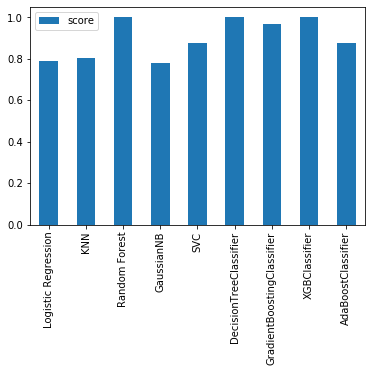

In [58]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

******************** SVC *********************


max acc score corresponding to 45 is: 0.7715736040609137
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy Score= 0.7715736040609137


Cross_val_score= 0.748207811043199


roc_auc_score =  0.5453719239373602


Classification report
               precision    recall  f1-score   support

           0       0.77      0.99      0.87       149
           1       0.71      0.10      0.18        48

    accuracy                           0.77       197
   macro avg       0.74      0.55      0.52       197
weighted avg       0.76      0.77      0.70       197



[[147   2]
 [ 43   5]]





******************** Random Forest *********************


max acc score corresponding to 47 is: 0.817258883248731
RandomForestClassifier(bootstrap=Tr

Cross_val_score= 0.8063037397700196


roc_auc_score =  0.7577600671140939


Classification report
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       149
           1       0.79      0.56      0.66        48

    accuracy                           0.86       197
   macro avg       0.83      0.76      0.78       197
weighted avg       0.85      0.86      0.85       197



[[142   7]
 [ 21  27]]







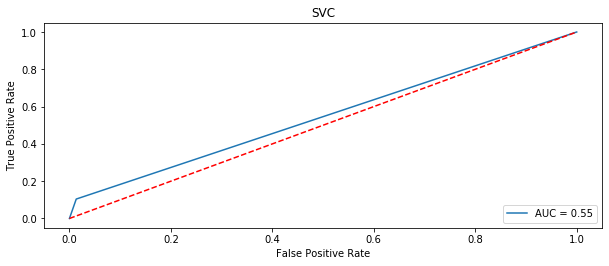

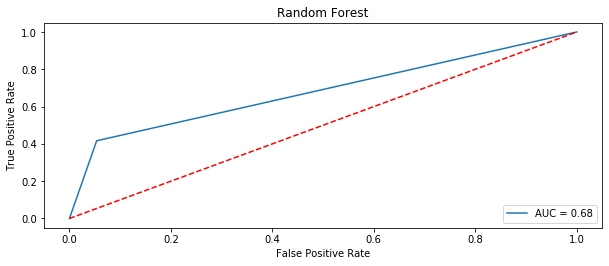

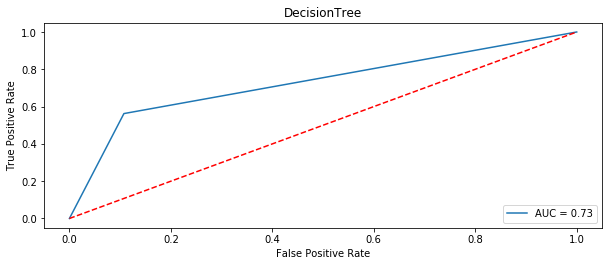

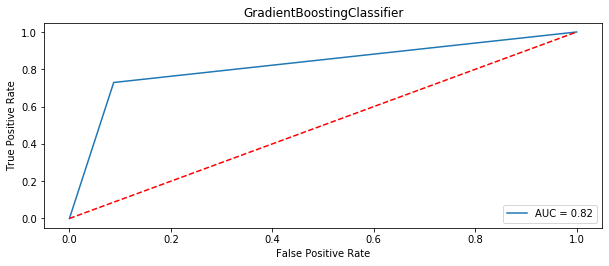

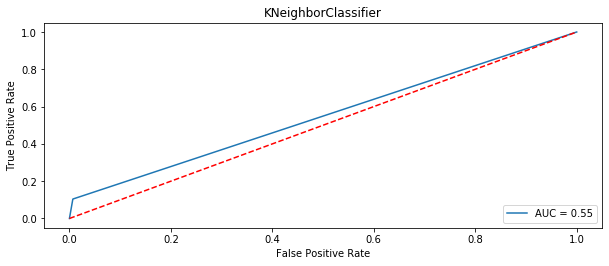

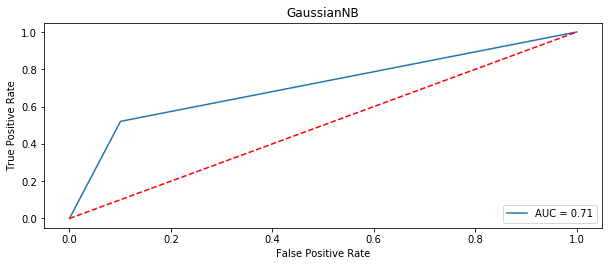

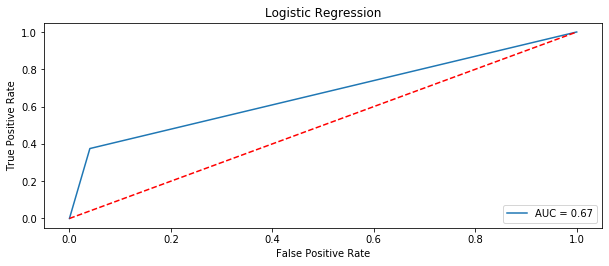

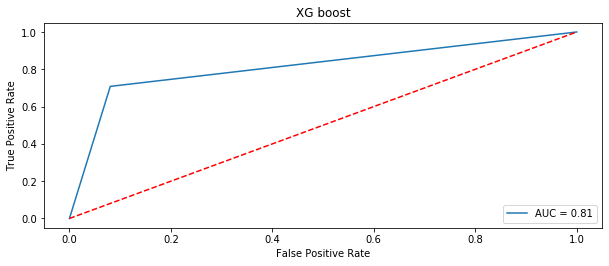

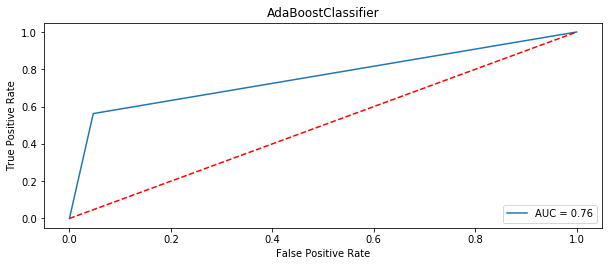

In [59]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("SVC",SVC()))
models.append(("Random Forest",RandomForestClassifier(n_estimators=100)))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("KNeighborClassifier",KNeighborsClassifier(n_neighbors=6)))
models.append(("GaussianNB",GaussianNB()))
models.append(("Logistic Regression",LogisticRegression()))
models.append(("XG boost",XGBClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))

Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("********************",name,"*********************")
    print('\n')
    Model.append(name)
    acc_state=maxrandomcore(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=0.20,stratify=y)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy Score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label= 'AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print("\n\n")



In [60]:
#lookover the accuracy_score,Cross_val_score,Roc_auc_curve in a DataFrame which we calculated above
result=pd.DataFrame({'Model':Model,'accuracy_score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,accuracy_score,Cross_val_score,Roc_auc_curve
0,SVC,77.157360,74.820781,54.537192
1,Random Forest,81.725888,76.244691,68.148770
2,DecisionTree,81.218274,77.985600,72.755872
3,GradientBoostingClassifier,86.802030,81.142650,82.095917
4,KNeighborClassifier,77.664975,74.514659,54.872763
5,GaussianNB,80.710660,74.513623,71.008110
6,Logistic Regression,81.725888,77.370766,66.736577
7,XG boost,86.802030,81.649746,81.389821
8,AdaBoostClassifier,85.786802,80.630374,75.776007


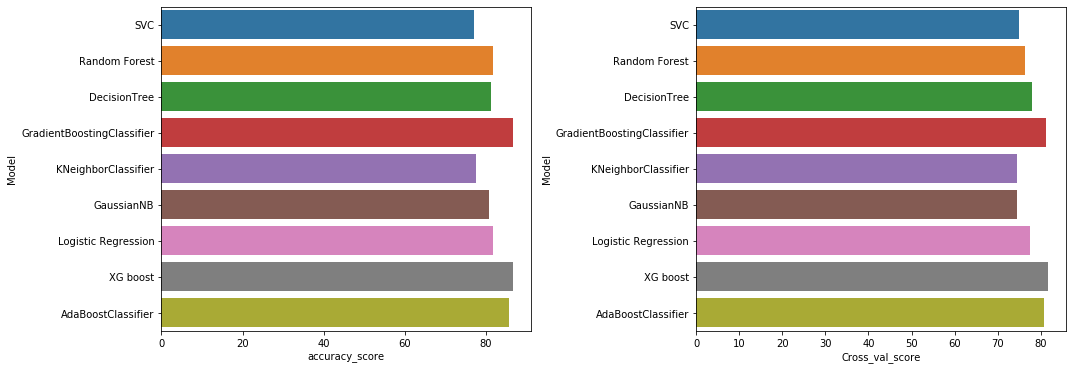

In [61]:
#Plotting bar plot of acc scores and cv scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'accuracy_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [62]:
#function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV

In [63]:
#for getting best set of parameters for DecisionTreeRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
gridD = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4],
        'criterion':['gini','entropy'],
         'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)
        }

clfD = DecisionTreeClassifier()

# Setup GridSearchCV
gs_clfD = GridSearchCV(estimator=clfD,
                      param_grid=gridD,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clfD.fit(x, y);

Fitting 5 folds for each of 201096 candidates, totalling 1005480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 6306 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 13664 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 23154 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 34724 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 48426 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 64208 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 82122 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 102116 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124242 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 148448 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 174786 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 203204 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Don

In [64]:
# best parameters for DecisionTreeClassifier
print("Best parameter:",gs_clfD.best_params_)
print("score:",gs_clfD.best_score_)

Best parameter: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'random_state': 1}
score: 0.8552574329224075


In [65]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
dtc =DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
print("DecisionTreeClassifier accuracy score:",maxrandomcore(dtc,x,y))
print("DecisionTreeClassifier roc_auc score:",max_aucroc_score(dtc,x,y))

max acc score corresponding to 57 is: 0.9035532994923858
DecisionTreeClassifier accuracy score: 57
max auc roc score corresponding to  57  is  0.9259173515453177
DecisionTreeClassifier roc_auc score: 57


In [66]:
#lets use gridsearchcv to find out best parameters for GradientBoostingClassifier
grid_3 = {
    "learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]
    }
clf = GradientBoostingClassifier()

# Setup GridSearchCV
gs_clf3 = GridSearchCV(estimator=clf,
                      param_grid=grid_3,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf3.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.9s finished


In [67]:
# best parameters for GradientBoostingClassifier
print("Best parameter:",gs_clf3.best_params_)
print("score:",gs_clf3.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 500}
score: 0.8393352931569492


In [68]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
gb=GradientBoostingClassifier(learning_rate= 0.01,n_estimators=500)
print("GradientBoostingClassifier accuracy score:",maxrandomcore(gb,x,y))
print("GradientBoostingClassifier roc_auc score:",max_aucroc_score(gb,x,y))

max acc score corresponding to 53 is: 0.8629441624365483
GradientBoostingClassifier accuracy score: 53
max auc roc score corresponding to  52  is  0.8730755874522516
GradientBoostingClassifier roc_auc score: 52


In [69]:
#lets use gridsearchcv to find out best parameters for RandomForestClassifier
grid = {'n_estimators': [500, 100,1000,700],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_sampl

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.5s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1,

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.6s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.7s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=700, total=   0.9s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.8min finished


In [70]:
# best parameters for RandomForestClassifier
print("Best parameter:",gs_clf.best_params_)
print("score:",gs_clf.best_score_)

Best parameter: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
score: 0.7755185366650336


In [90]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
rf=RandomForestClassifier(n_estimators=100,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
print("RandomForestClassifier accuracy score:",maxrandomcore(rf,x,y))
print("RandomForestClassifier roc_auc score:",max_aucroc_score(rf,x,y))

max acc score corresponding to 55 is: 0.8223350253807107
RandomForestClassifier accuracy score: 55
max auc roc score corresponding to  79  is  0.7530385461280241
RandomForestClassifier roc_auc score: 79


In [72]:
#lets use gridsearchcv to find out best parameters for SVC
grid_4 = { 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000],'kernel':['linear','poly','rbf']
         }
clf = SVC()

# Setup GridSearchCV
gs_clf4 = GridSearchCV(estimator=clf,
                      param_grid=grid_4,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

gs_clf4.fit(x_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=1, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ................ C=100, gamma=0.001, kernel=linear, total=   2.8s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.9s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=  13.3s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 15.7min finished


In [73]:
#best parameters for svc
print("Best parameter:",gs_clf4.best_params_)
print("score:",gs_clf4.best_score_)

Best parameter: {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
score: 0.7691164461865099


In [74]:
#checking accuracy score and roc_auc_score using best parameters which calculated from gridsearchCV
svc=SVC(C=10,gamma=0.001,kernel='linear')
print("SVC accuracy score:",maxrandomcore(svc,x,y))
print("SVC roc_auc score:",max_aucroc_score(svc,x,y))

max acc score corresponding to 91 is: 0.8477157360406091
SVC accuracy score: 91
max auc roc score corresponding to  77  is  0.7862599837944206
SVC roc_auc score: 77


In [75]:
#lets use gridsearchcv to find out best parameters for AdaBoostClassifier
grid_ad =  {
 'n_estimators': [50,60,70],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
}
clf = AdaBoostClassifier()

# Setup GridSearchCV
gs_clfad = GridSearchCV(estimator=clf,
                      param_grid=grid_ad,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clfad.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.6s finished


In [76]:
# best parameters for AdaBoostClassifier
print("Best parameter:",gs_clfad.best_params_)
print("score:",gs_clfad.best_score_)

Best parameter: {'learning_rate': 1, 'n_estimators': 70}
score: 0.8035848440307038


In [91]:
#checking accuracy score and roc score using best parameters which calculated from gridsearchCV 
ad=AdaBoostClassifier(learning_rate=1,n_estimators=70)
print("AdaBoostClassifier accuracy score:",maxrandomcore(ad,x,y))
print("AdaBoostClassifier roc_auc score:",max_aucroc_score(ad,x,y))

max acc score corresponding to 86 is: 0.8527918781725888
AdaBoostClassifier accuracy score: 86
max auc roc score corresponding to  80  is  0.7841764093066327
AdaBoostClassifier roc_auc score: 80


In [92]:
#using AdaBoostClassifier base_estimator as decision tree
random_state=57
dtc =DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
ada_rm=AdaBoostClassifier(base_estimator=dtc,learning_rate=0.01,n_estimators=50)
ada_rm.fit(x_train, y_train)
y_predrad = ada_rm.predict(x_test)
evaluate_preds(y_test,y_predrad)


Acc: 85.79%
Precision: 0.66
Recall: 0.88
F1 score: 0.75


{'accuracy': 0.86, 'precision': 0.66, 'recall': 0.88, 'f1': 0.75}

# After all this process conclusion is that DecisionTreeClassifier  performing well because of high roc_auc score and accuracy score.


In [93]:
#lets make our final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 57,test_size=0.20,stratify=y)
dtc =DecisionTreeClassifier(criterion= 'gini', max_depth= 4, max_leaf_nodes= 4, min_samples_split= 2)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
evaluate_preds(y_test,preddtc)

Acc: 90.36%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


{'accuracy': 0.9, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

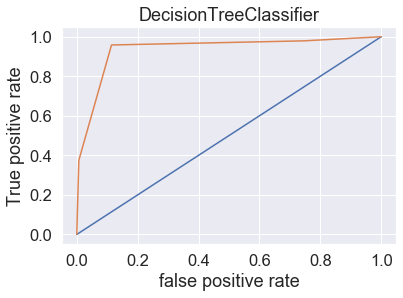

roc_auc_score =  0.9363814317673378


In [94]:
# Make predictions with probabilities
y_probs = dtc.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

[[132  17]
 [  2  46]]


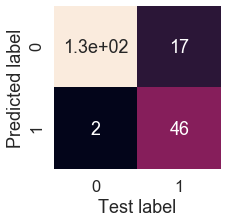

In [95]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, preddtc):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, preddtc),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, preddtc)
#lets printed confusion_matrix
print(confusion_matrix(y_test, preddtc))

In [96]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=preddtc
test
# On the lest side values are those fields which are taken by machine for test...

,fraud_reported,Predicted values
583,0,0
212,0,0
503,0,0
69,0,0
872,1,1
...,...,...
743,1,1
651,0,0
162,0,0
477,1,1


In [97]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(preddtc)
df1.to_csv('Project_16_Automobile_Insurance_fraud_submission.csv')

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (fraud_reported) 

In [98]:
# Find feature importance of our best model
dtc.feature_importances_

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.3678403, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.6321597, 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ])

In [99]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=35,figsize=(18,8)):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()



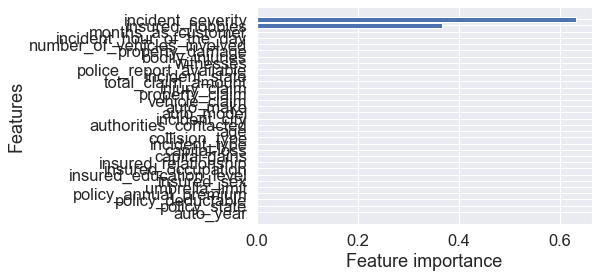

In [100]:
#bar plot of important features 
plot_features(x_train.columns, dtc.feature_importances_)
#Looks like incident severity contribute the most.

In [101]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(dtc,'Project_16_Automobile_Insurance_fraud_submission.pkl')

['Project_16_Automobile_Insurance_fraud_submission.pkl']

In [102]:
#read the file using joblib
dtc_from_joblib=joblib.load('Project_16_Automobile_Insurance_fraud_submission.pkl')
joblib_y_preds = dtc_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 90.36%
Precision: 0.73
Recall: 0.96
F1 score: 0.83


{'accuracy': 0.9, 'precision': 0.73, 'recall': 0.96, 'f1': 0.83}

## Conclusion:

1) Number of persons who have done fraud increases as age increases upto age 41 and after that it starts decreases as age increases.
2) In Policy 'IL' number of frauds are less as compared to the ploicy 'OH' and 'IN'.
3) Less frauds occured where policy_deductable is 1000.
4) More fraud occurs where umbrella_limit is 0.
5) Males do more fraud than females.
6) Less fraud is less where insured education level is High School.
7) Fraud is more where occupation 'isexec-managerial' and less where occupation is 'machine-op-inspct'.
8) Fraud is more where insured_hobbies is 'Chess' and less where insured_hobbies is 'camping'.
9) Fraud is done more in single and mutli-vehicle collision.
10) Proportion of rear collision is more.
11) More fraud occurs when damage is Major.
12) Proportion where ambulance is contacted is more than fire, police etc
13) More Number of incidents are more where incident_statae is 'SC'.
14) Here  we see classes are imbalanced and there are less no of  frauds are there
16) As we can observe that incidents involving minor damage have higher cases of fraud report.
17) We can see that, highest no. of frauds have been reported in the age range of 31-40.
19) Female leads with highest number of fraud reported cases

## Steps Followed:

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_16_Automobile_Insurance_fraud_submission.csv file.
9) Pickle file is named with Project_16_Automobile_Insurance_fraud_submission.pkl 